# **Trabajo final Aprendizaje de Máquina 20co2025**

## **Integrantes**

- Maximiliano José Bernardo.
- Alejandro Nicolás Tacchella.

## **Descripción de los datos**

### **Origen**

Dataset proporcionado por ACTrans (Asociación Civil de Transporte). La Asociación Civil de Transporte fue constituida el 20 de mayo de 2010, como coadministrador y contralor del Sistema Único de Boleto Electrónico SUBE implementado por el Decreto del Poder Ejecutivo Nacional Nº 84 del 4 de febrero de 2009 y sus normas complementarias.

Página web: https://www.actrans.com.ar/web

El dataset es sobre los recorridos (líneas) de la empresa de transporte "Empresa Línea 216" operante en el Área Metropolitana de Buenos Aires.

### **Variables**

- FECHA: Fecha de las operaciones. Tipo: Fecha.

- LINEA: Código del recorrido. Tipo: Categórico.

- CANT. TRX: Cantidad de transacciones efectuadas (pasajeros). Tipo: Númerico.

- RECAUDACION: Cantidad de dinero recaudado. Tipo: Númerico.

- KM: Distancia total diaria recorrida. Tipo: Númerico.


## **Planteamiento de la pregunta de investigación**

¿Cómo evolucionan las transacciones diarias por los recorridos de autobús entre 2020 y 2025? ¿Es posible predecir la demanda futura para un día determinado en un recorrido determinado?

In [331]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import xgboost as xgb
from sklearn.svm import SVR

## **Análisis exploratorio de datos (EDA)**

In [332]:
# Leer todas las hojas del Excel
archivo_excel = "trx_recaudacion_km_empresa_54_2020_2025.xlsx"
hojas = pd.read_excel(archivo_excel, sheet_name=None)

# Lista para guardar los DataFrames transformados
df_lista = []

for nombre_hoja, df in hojas.items():
    df = df.set_index('FECHA', drop=False)  # establecer FECHA como índice
    df['LINEA'] = nombre_hoja.strip()  # agregar nombre de hoja como línea
    df_lista.append(df)
    print(f"Línea: {nombre_hoja}")
    display(df.info())

Línea: 166
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1988 non-null   float64       
 2   RECAUDACION  1988 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 236
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1988 non-null   float64       
 2   RECAUDACION  1988 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 269
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1987 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 395
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1986 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 441
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1986 non-null   float64       
 2   RECAUDACION  1986 non-null   float64       
 3   KM           1986 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 443
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1985 non-null   float64       
 2   RECAUDACION  1985 non-null   float64       
 3   KM           1985 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 504
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1987 non-null   float64       
 2   RECAUDACION  1987 non-null   float64       
 3   KM           1988 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 634
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1985 non-null   float64       
 2   RECAUDACION  1985 non-null   float64       
 3   KM           1987 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

Línea: 504I
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2020-01-01 to 2025-06-11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        1989 non-null   datetime64[ns]
 1   CANT. TRX    1889 non-null   float64       
 2   RECAUDACION  1889 non-null   float64       
 3   KM           1899 non-null   float64       
 4   LINEA        1989 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.2+ KB


None

### **Tratamiento de valores nulos**

Podemos observar que unicamente en los features CANT. TRX, RECAUDACION y KM encontramos valores nulos. Para no eliminar una fecha procedemos a imputarlos con el último valor no nulo conocido.

In [333]:
# Completamos valores nulos en CANT. TRX, RECAUDACION y KM
for df_linea in df_lista:
    df['FECHA'] = pd.to_datetime(df['FECHA'])
    df_linea['CANT. TRX'] = df_linea['CANT. TRX'].ffill()
    df_linea['RECAUDACION'] = df_linea['RECAUDACION'].ffill()
    df_linea['KM'] = df_linea['KM'].ffill()

In [334]:
# Unir todos los DataFrames
df_final = pd.concat(df_lista, ignore_index=True)

# Reordenar columnas
columnas = ['FECHA', 'LINEA', 'CANT. TRX', 'RECAUDACION', 'KM']
df_final = df_final[columnas]

In [335]:
df_final

FECHA LINEA  CANT. TRX  RECAUDACION         KM
0     2020-01-01   166     9121.0    142707.83   8350.738
1     2020-01-02   166    34135.0    493514.22  15555.049
2     2020-01-03   166    37207.0    535227.08  15866.048
3     2020-01-04   166    31732.0    470262.62  16829.046
4     2020-01-05   166    22091.0    329308.39  12240.411
...          ...   ...        ...          ...        ...
17896 2025-06-07  504I      336.0    127582.38    650.192
17897 2025-06-08  504I      204.0     75651.72    668.249
17898 2025-06-09  504I      967.0    320191.52    946.772
17899 2025-06-10  504I      926.0    289751.48    927.829
17900 2025-06-11  504I      904.0    302785.03   1005.842

[17901 rows x 5 columns]

In [336]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17901 entries, 0 to 17900
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        17901 non-null  datetime64[ns]
 1   LINEA        17901 non-null  object        
 2   CANT. TRX    17901 non-null  float64       
 3   RECAUDACION  17901 non-null  float64       
 4   KM           17901 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 699.4+ KB


### **Análisis de outliers por línea**

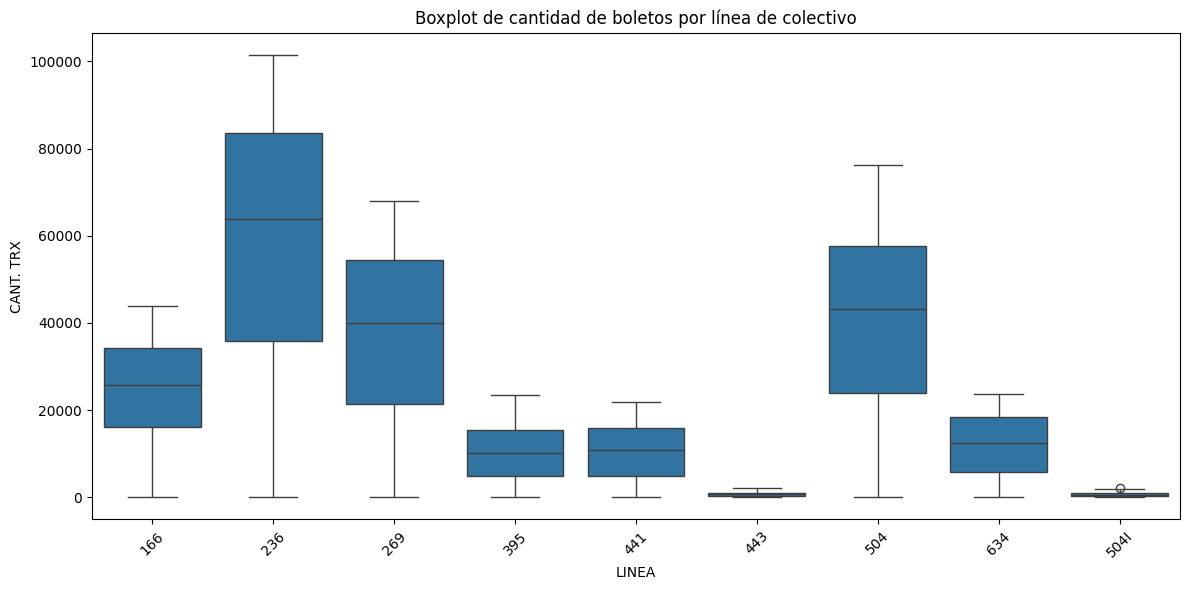

In [337]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LINEA', y='CANT. TRX', data=df_final)
plt.title("Boxplot de cantidad de boletos por línea de colectivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Para el feature CANT. TRX apenas si se observan outliers en la línea 504I sobre el límite del boxplot, por lo que no es necesario aplicar un tratamiento.

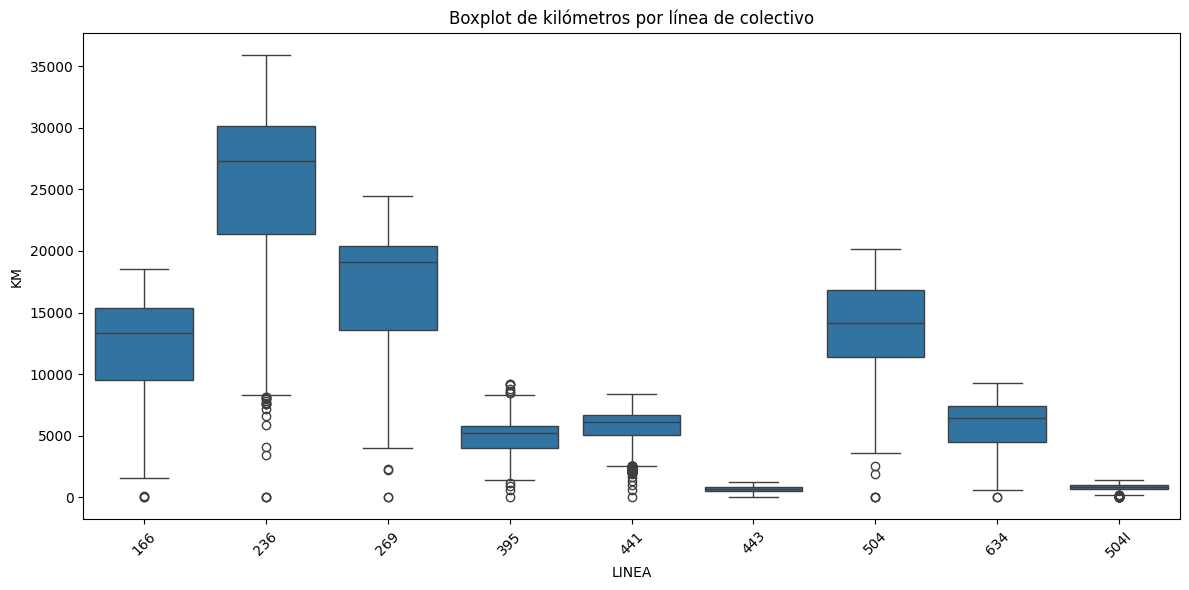

In [338]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LINEA', y='KM', data=df_final)
plt.title("Boxplot de kilómetros por línea de colectivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En contraposición a CANT. TRX en el feature KM vemos un gran presencia de outliers. Siendo así optamos por imputar los mismos con la mediana para balancear los datos.

In [339]:
def reemplazar_outliers_por_mediana(df, columnas):
    df = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        mediana = df[col].quantile(0.5)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        mask_outlier = (df[col] < limite_inferior) | (df[col] > limite_superior)
        df.loc[mask_outlier, col] = mediana
    return df
     
columnas_a_filtrar = ['KM']

df_lista = [reemplazar_outliers_por_mediana(df_linea, columnas_a_filtrar) for df_linea in df_lista]

In [340]:
# Unir todos los DataFrames de nuevo
df_final = pd.concat(df_lista, ignore_index=True)

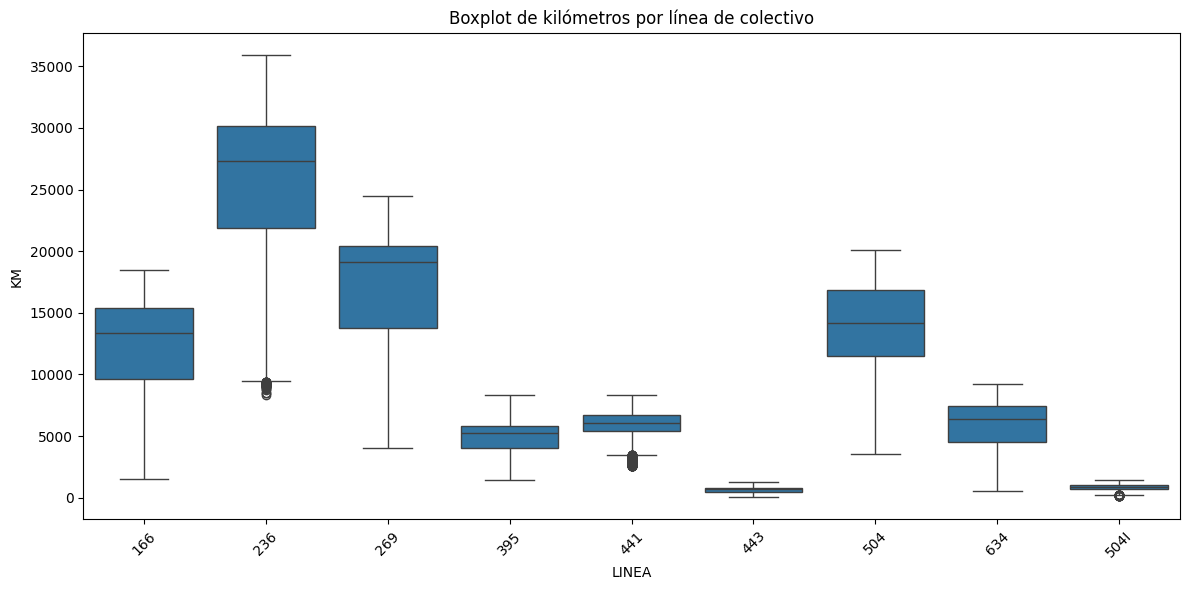

In [341]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LINEA', y='KM', data=df_final)
plt.title("Boxplot de kilómetros por línea de colectivo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Luego de aplicar el tratamiento vemos que los outliers se han arreglado en gran medida y ahora solo vemos algunos en los límites de los boxplots por una cuestión de que datos que antes no eran tomados como outliers luego de la imputación sí aparecen de esa forma, pero esto no amerita un nuevo tratamiento.

### **Features adicionales**

Agregamos features por día de la semana y mes calculados a partir de FECHA de manera de tener ciertas referencias para los gráficos a continuación.

In [342]:
df = df_final

# Día de la semana (0=lunes, 6=domingo)
df['weekday'] = df['FECHA'].dt.weekday

df['nombre_dia'] = df['FECHA'].dt.day_name()

#aseguro el orden correcto de los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['nombre_dia'] = pd.Categorical(df['nombre_dia'], categories=dias_ordenados, ordered=True)

# Mes (1-12)
df['month'] = df['FECHA'].dt.month

df['nombre_mes'] = df['FECHA'].dt.month_name()

# Para asegurar el orden correcto
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
df['nombre_mes'] = pd.Categorical(df['nombre_mes'], categories=meses_ordenados, ordered=True)

# Variables cíclicas
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df.drop(columns=['weekday', 'month'], inplace=True)

### **Análisis de boletos vendidos por día de la semana y mes**

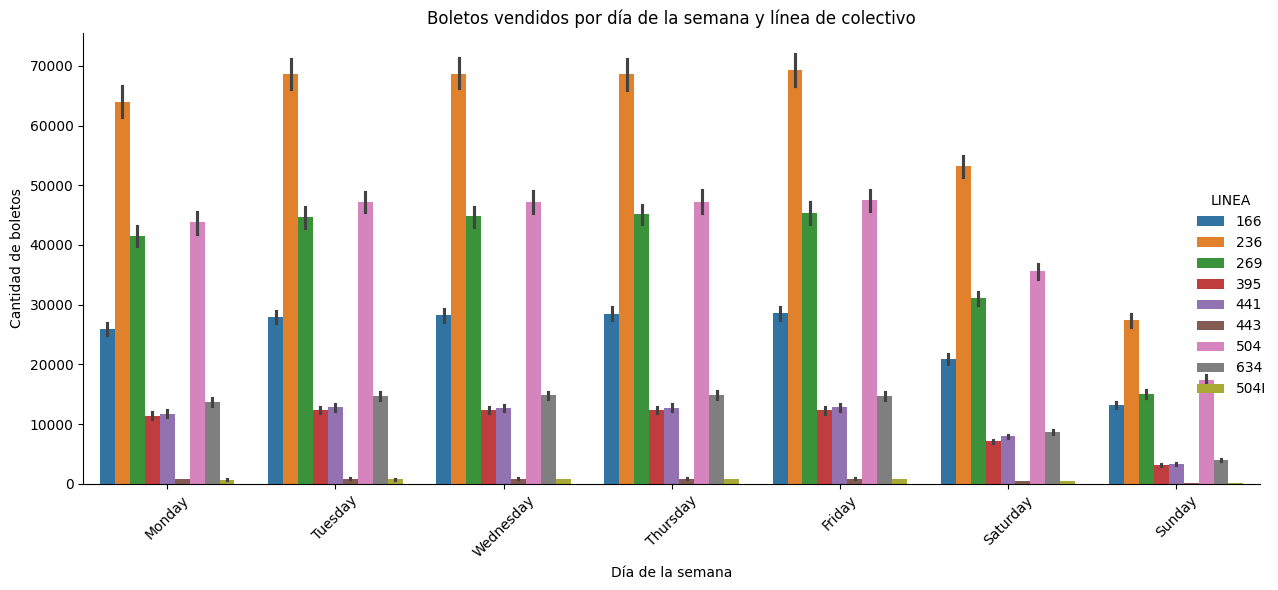

In [343]:
sns.catplot(
    data=df,
    kind="bar",
    x="nombre_dia",
    y='CANT. TRX',
    hue="LINEA",
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por día de la semana y línea de colectivo")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

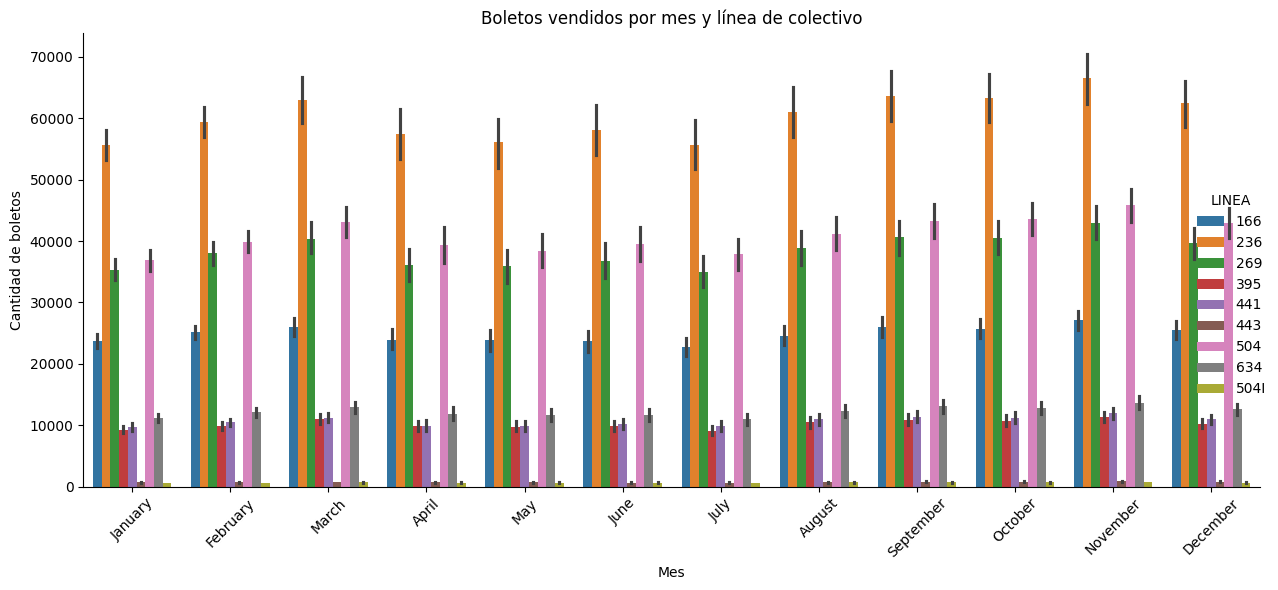

In [344]:

sns.catplot(
    data=df,
    kind="bar",
    x="nombre_mes",
    y='CANT. TRX',
    hue='LINEA',
    height=6,
    aspect=2
)

plt.title("Boletos vendidos por mes y línea de colectivo")
plt.xlabel("Mes")
plt.ylabel("Cantidad de boletos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hay una clara predominancia de boletos vendidos por parte de la línea 236, y muy pocos por parte de las líneas 634 y 504I.

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_35742/1030630302.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()


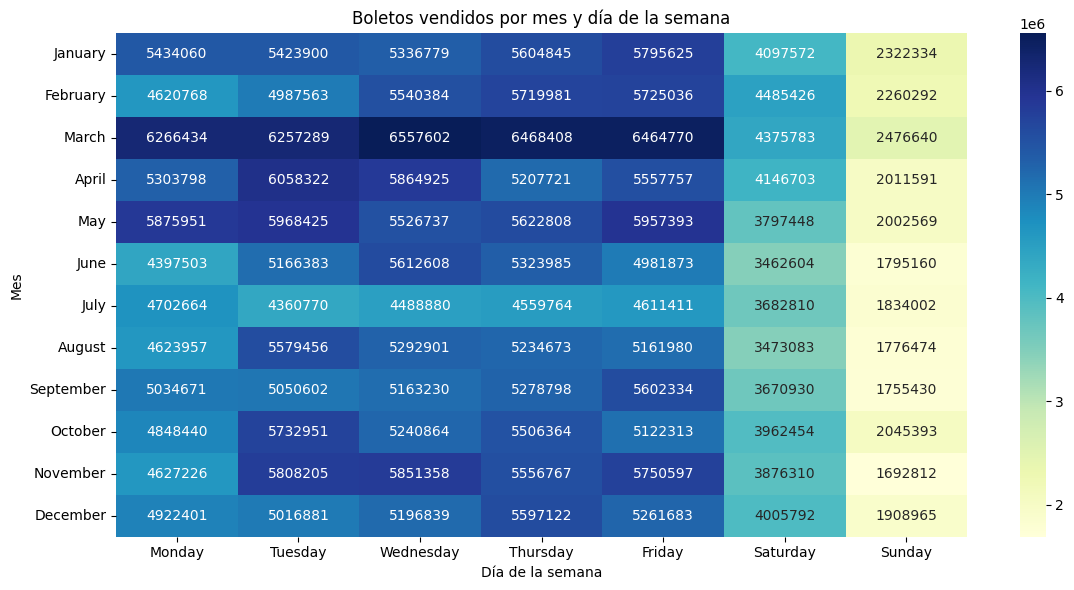

In [345]:
tabla = df.groupby(['nombre_mes', 'nombre_dia'])['CANT. TRX'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Boletos vendidos por mes y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

Con el gráfico previo podemos sospechar que hay tanto tendencias semanales como mensuales. Por ejemplo, en Marzo durante los días Miércoles, Jueves y Viernes se nota la mayor concentración de pasajeros. Pero en Julio, durante los mismos días se ve la menor concentración de pasajeros. Esto sin contar los fines de semana que claramente son siempre días que tienen poca demanda de pasajeros.

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_35742/1233145774.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = df.groupby(['nombre_mes', 'nombre_dia'])['KM'].sum().unstack()


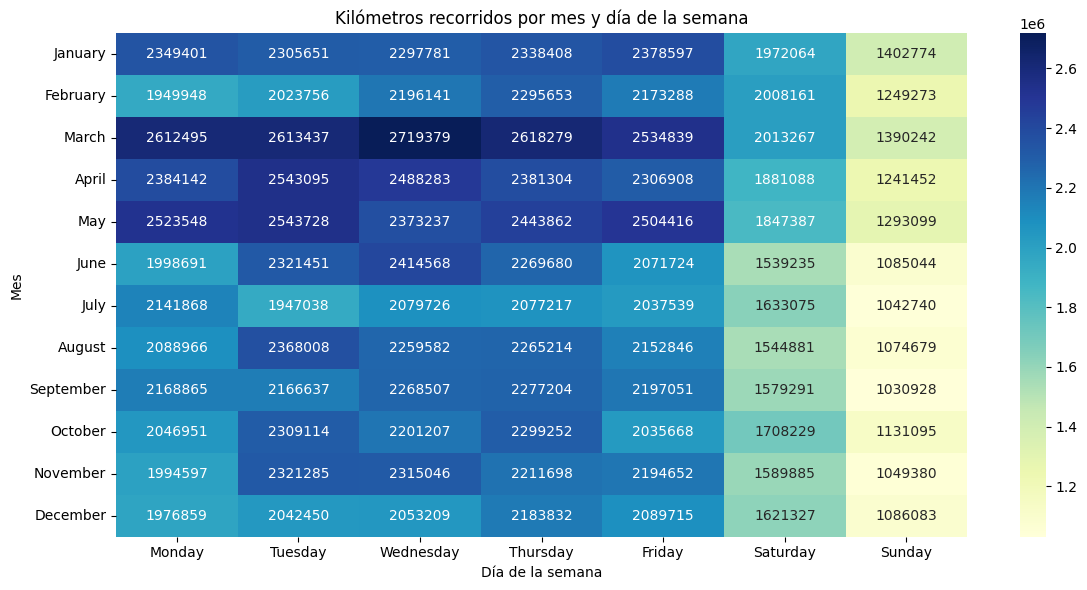

In [346]:
tabla = df.groupby(['nombre_mes', 'nombre_dia'])['KM'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(tabla, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Kilómetros recorridos por mes y día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()

Este último gráfico es interesante para denotar que hay una relación entre los kilómetros recorridos y la demanda de pasajeros. Ya que son gráficos donde las tendencias se ven bastante similares.

### **QQ Plot**

Comparamos los datos de cada Línea contra las distribuciones Normal y Chi2, para ver si se ajustan a las mismas.

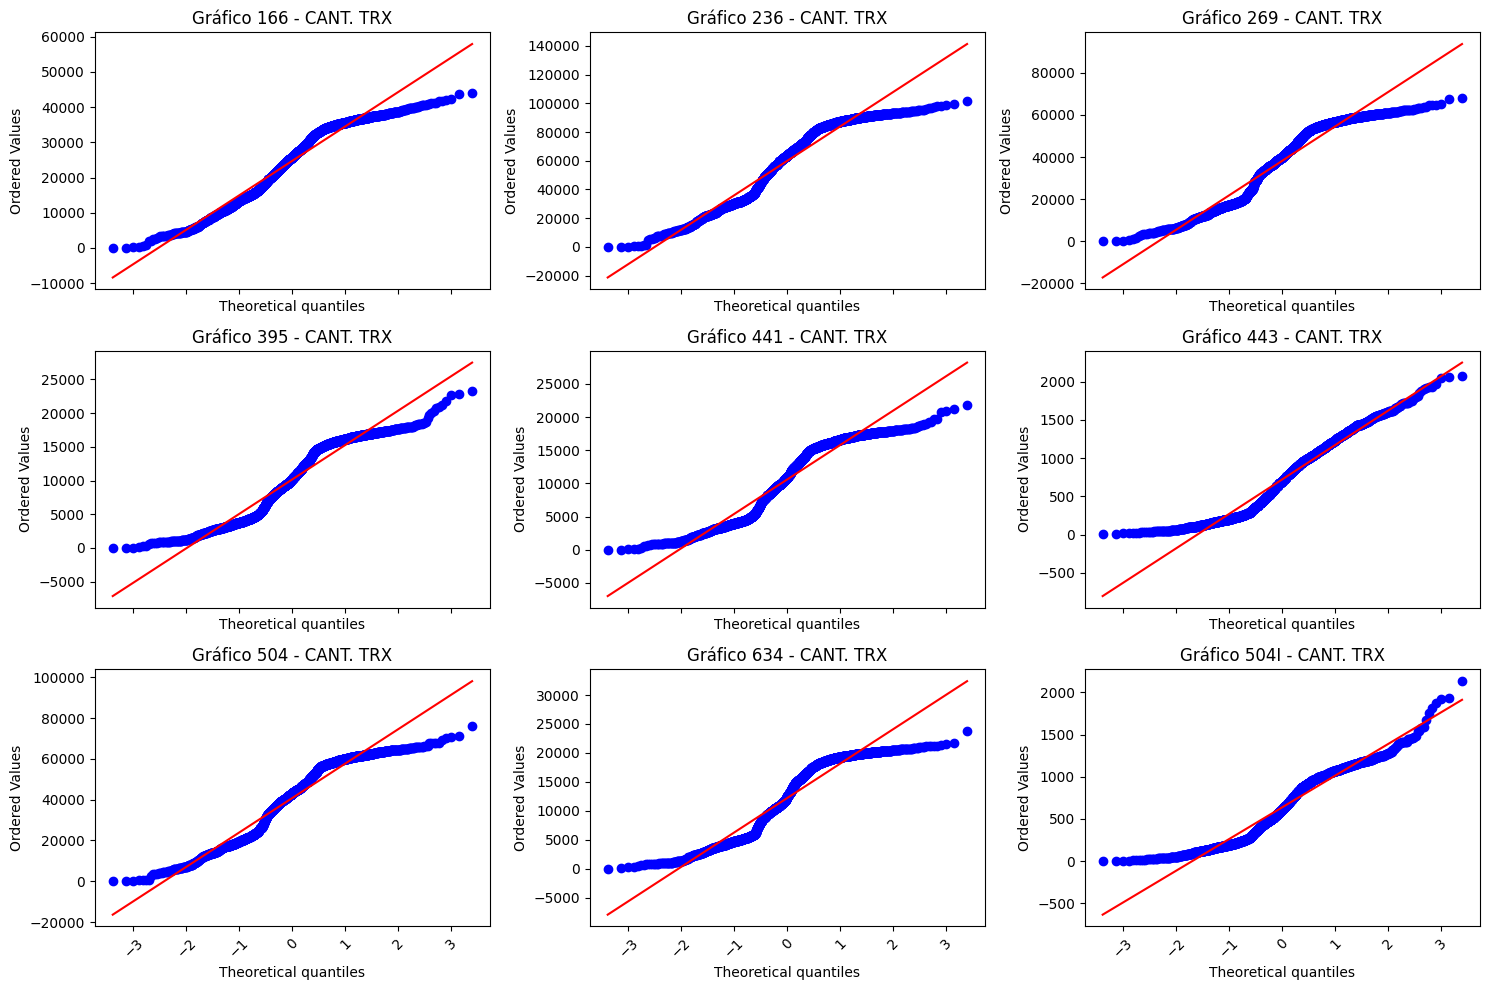

In [347]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
axs = axs.flatten()  # Aplana la matriz de ejes 3x3

for i, df_linea in enumerate(df_lista):
    stats.probplot(df_linea['CANT. TRX'], dist='norm', plot=axs[i])
    axs[i].set_title(f"Gráfico {df_linea['LINEA'].iloc[0]} - CANT. TRX")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Se puede observar que los datos no se ajustan a una distribución normal, en ciertos puntos del gráfico hay algo de coincidencia pero visto globalmente no.

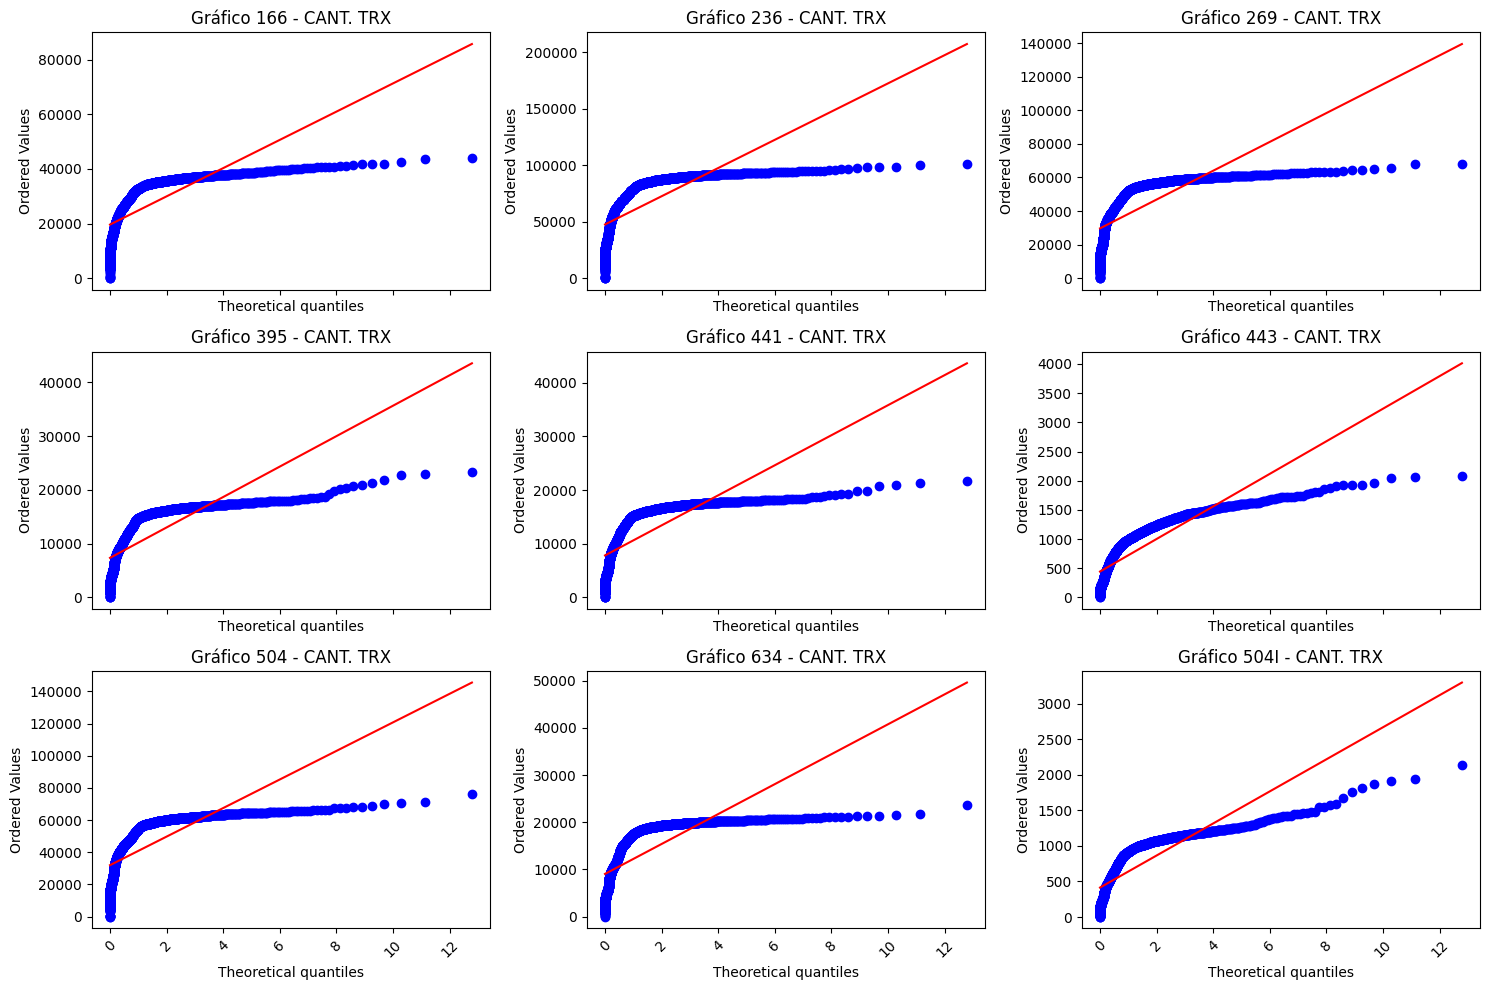

In [348]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
axs = axs.flatten()  # Aplana la matriz de ejes 3x3

for i, df_linea in enumerate(df_lista):
    stats.probplot(df_linea['CANT. TRX'], sparams=(1,), dist='chi2', plot=axs[i])
    axs[i].set_title(f"Gráfico {df_linea['LINEA'].iloc[0]} - CANT. TRX")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Aún menos que con la normal, los datos no se ajustan para nada a una distribución Chi2.

Como conclusión para la comparación con estas distribuciones podemos obtener que los datos no presentan una distribución Normal ni Chi2. Investigando un poco más, encontramos que esto puede deberse a que presentan patrones semanales los cuales no son posibles de identificar con este tipo de gráfico, ya que estos observan una distribución de manera global.

### **Comportamiento a lo largo de los años**

Tomamos de referencia una de las líneas para evaluar diferentes periodicidades: por día, mensual y semanal.

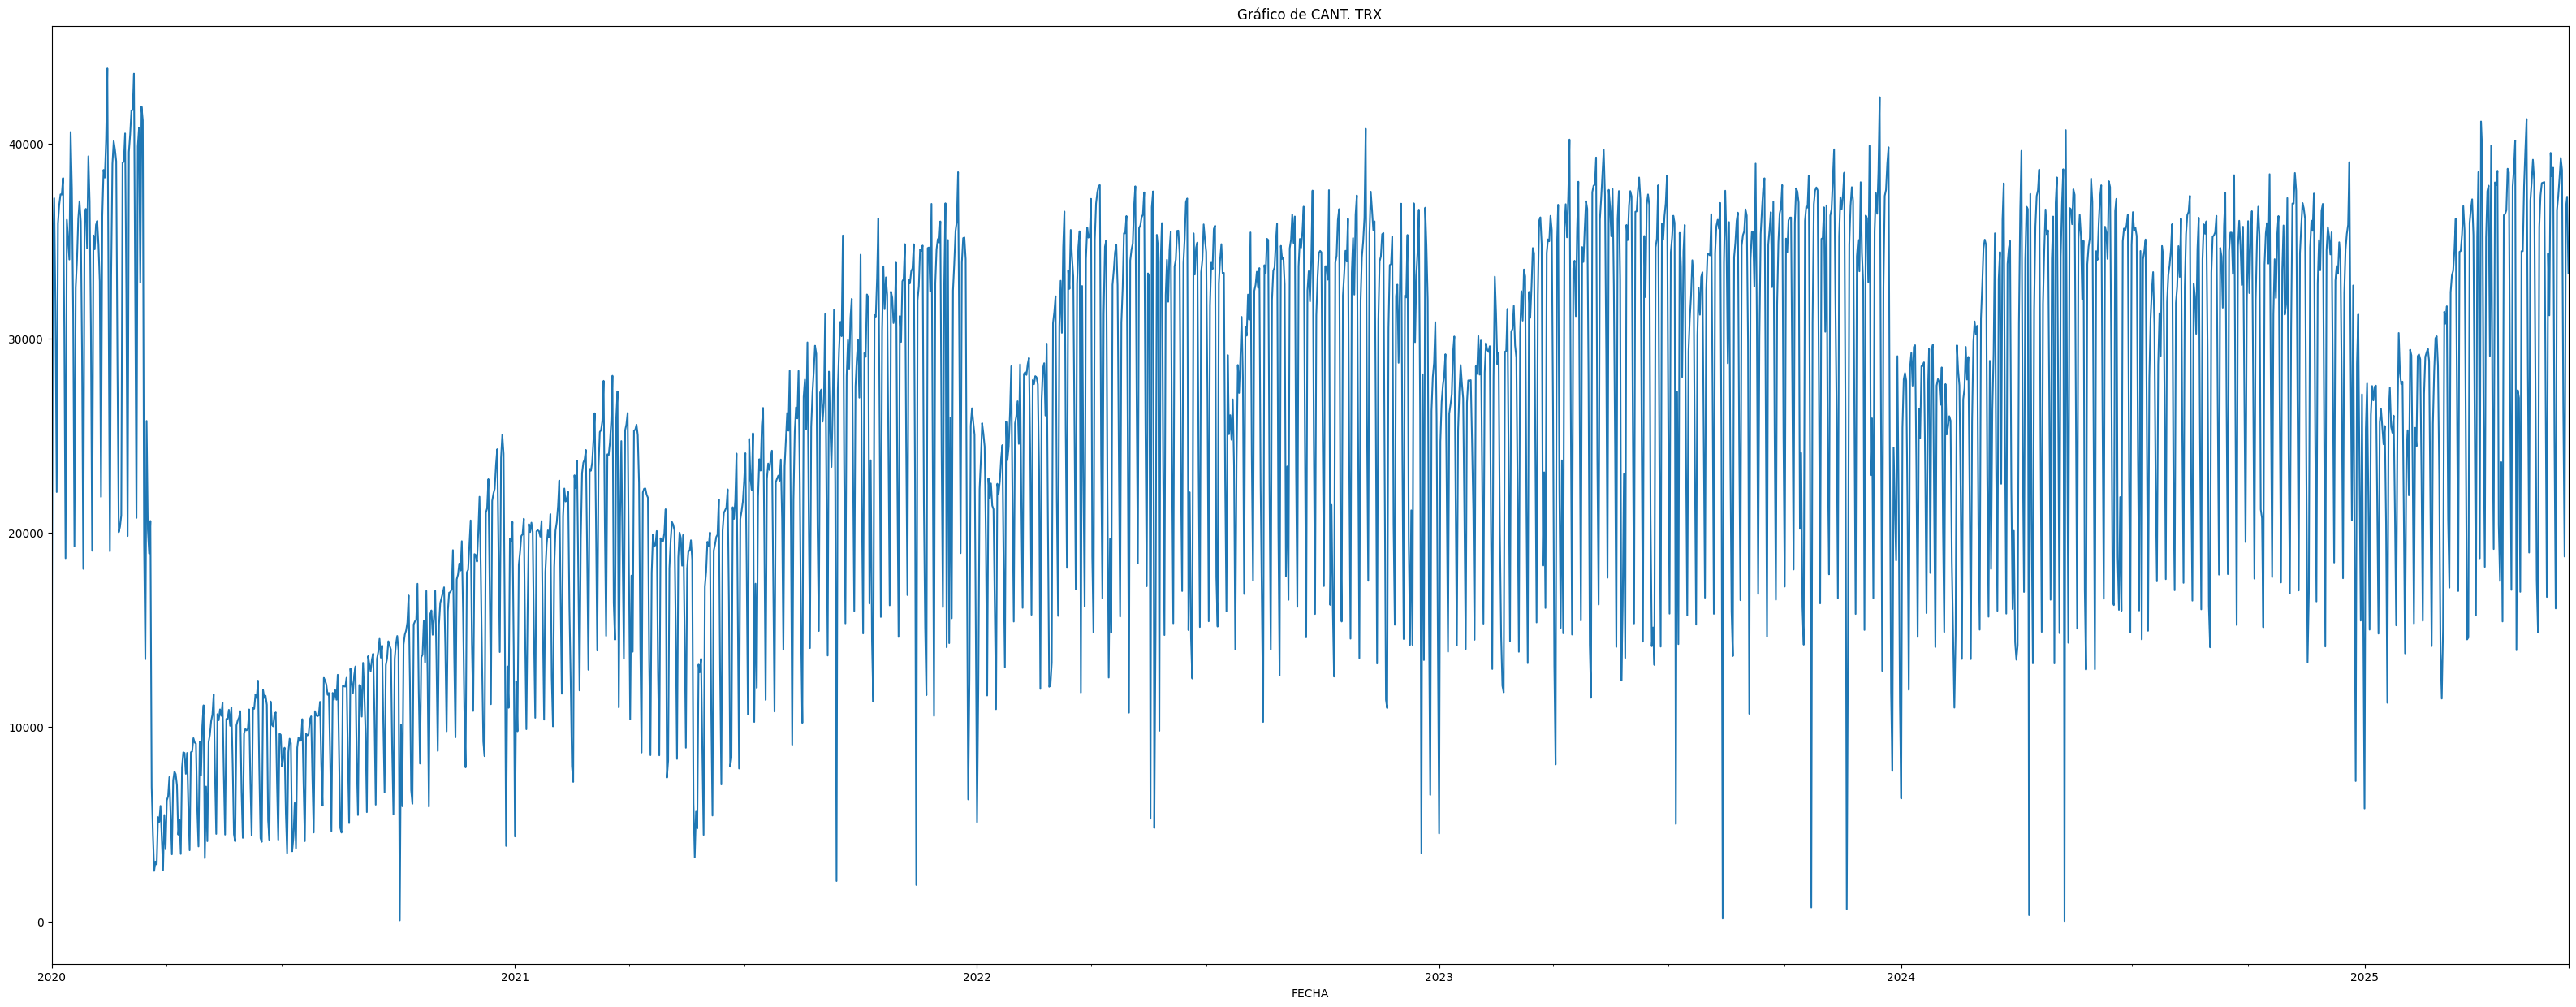

In [349]:
df_new = df_lista[0]['CANT. TRX']
df_new.plot(title="Gráfico de CANT. TRX", figsize=(40, 15))
plt.show()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_35742/1488799866.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_new = df_lista[0]['CANT. TRX'].resample(rule='M').mean()


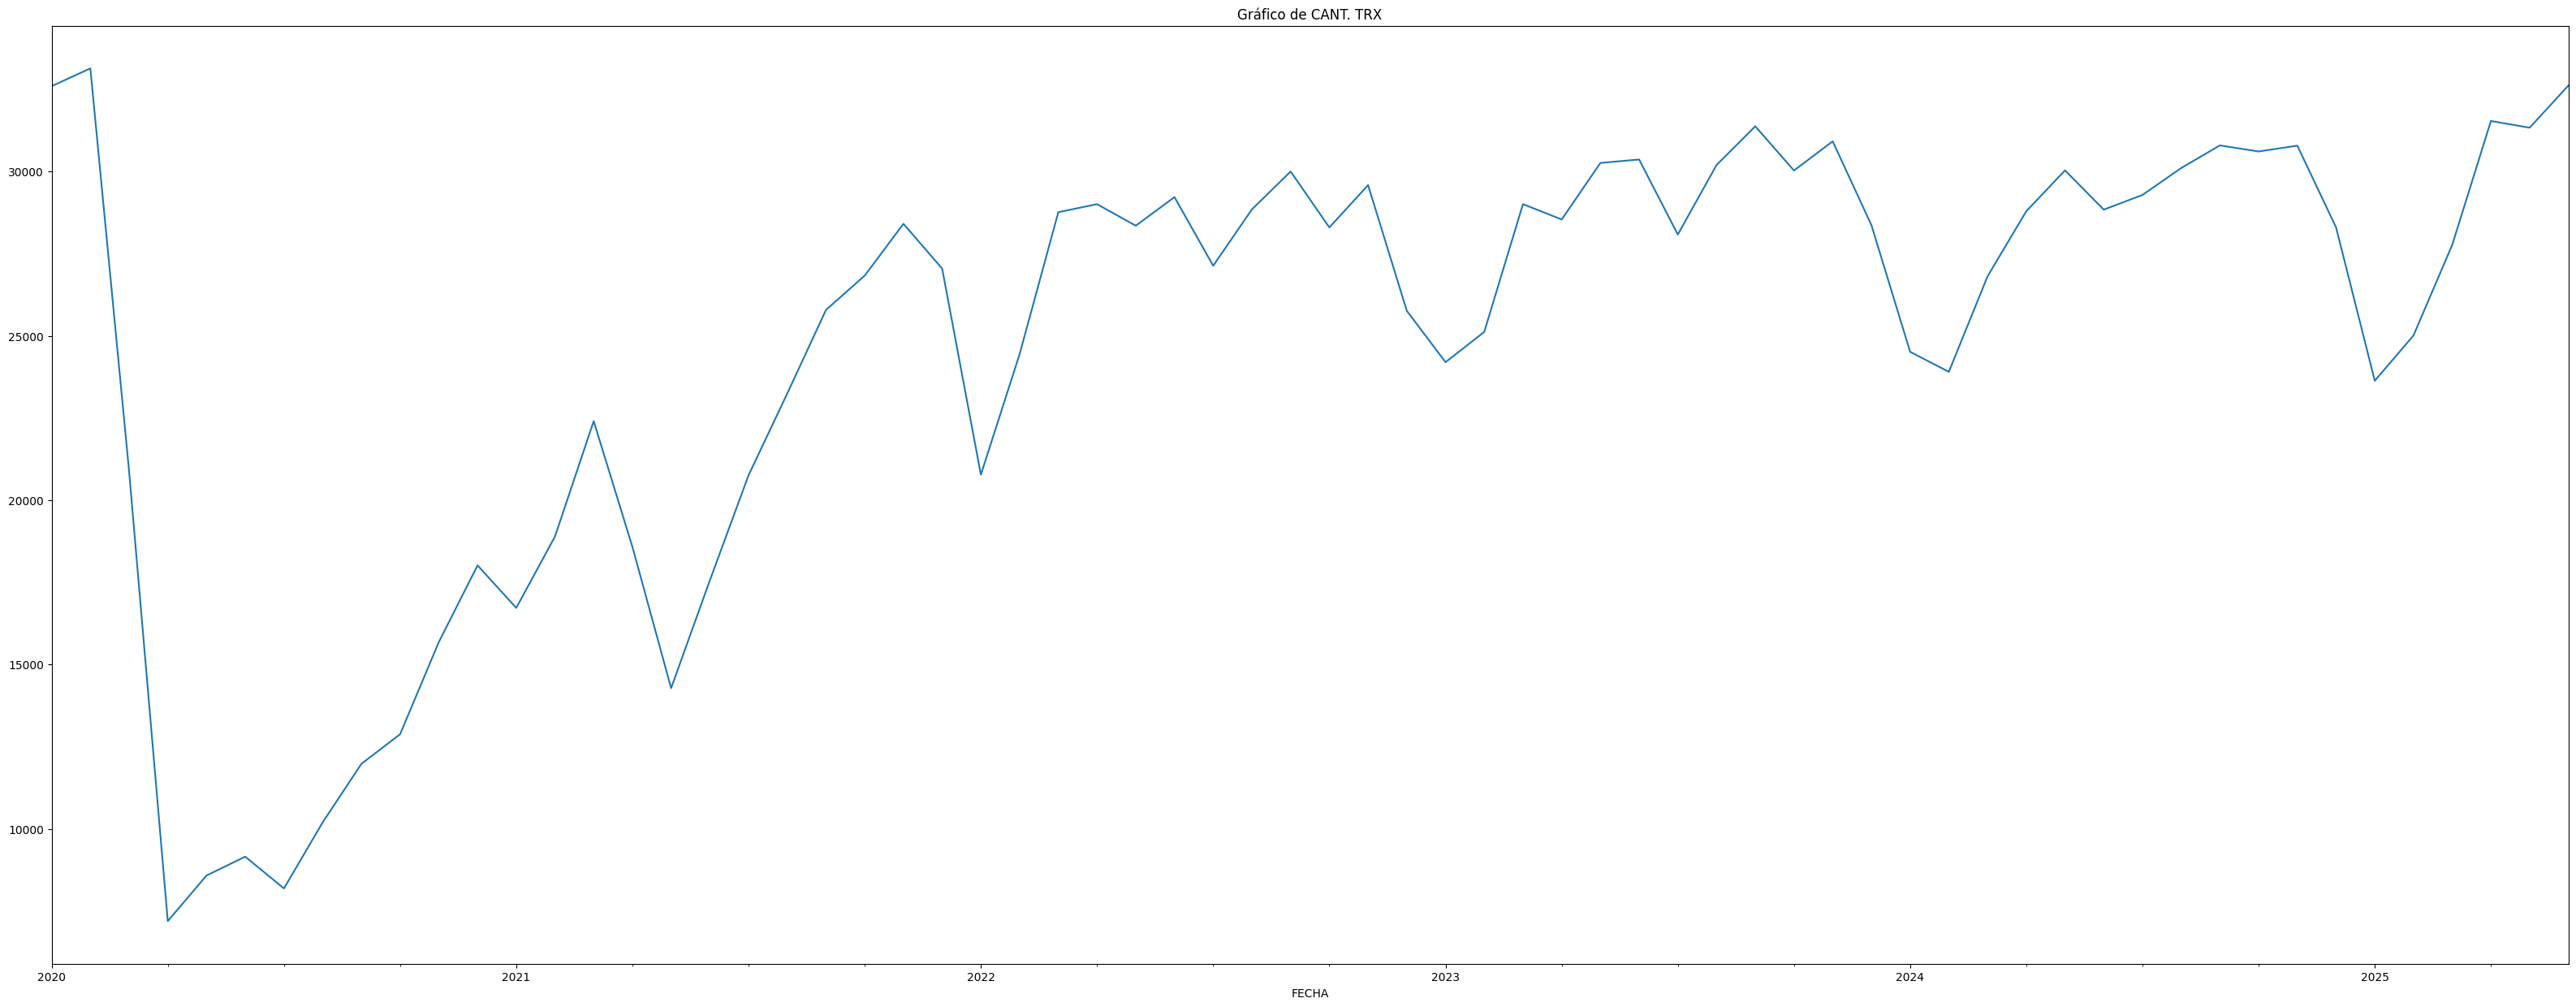

In [350]:
df_new = df_lista[0]['CANT. TRX'].resample(rule='M').mean()
df_new.plot(title="Gráfico de CANT. TRX", figsize=(40, 15))
plt.show()

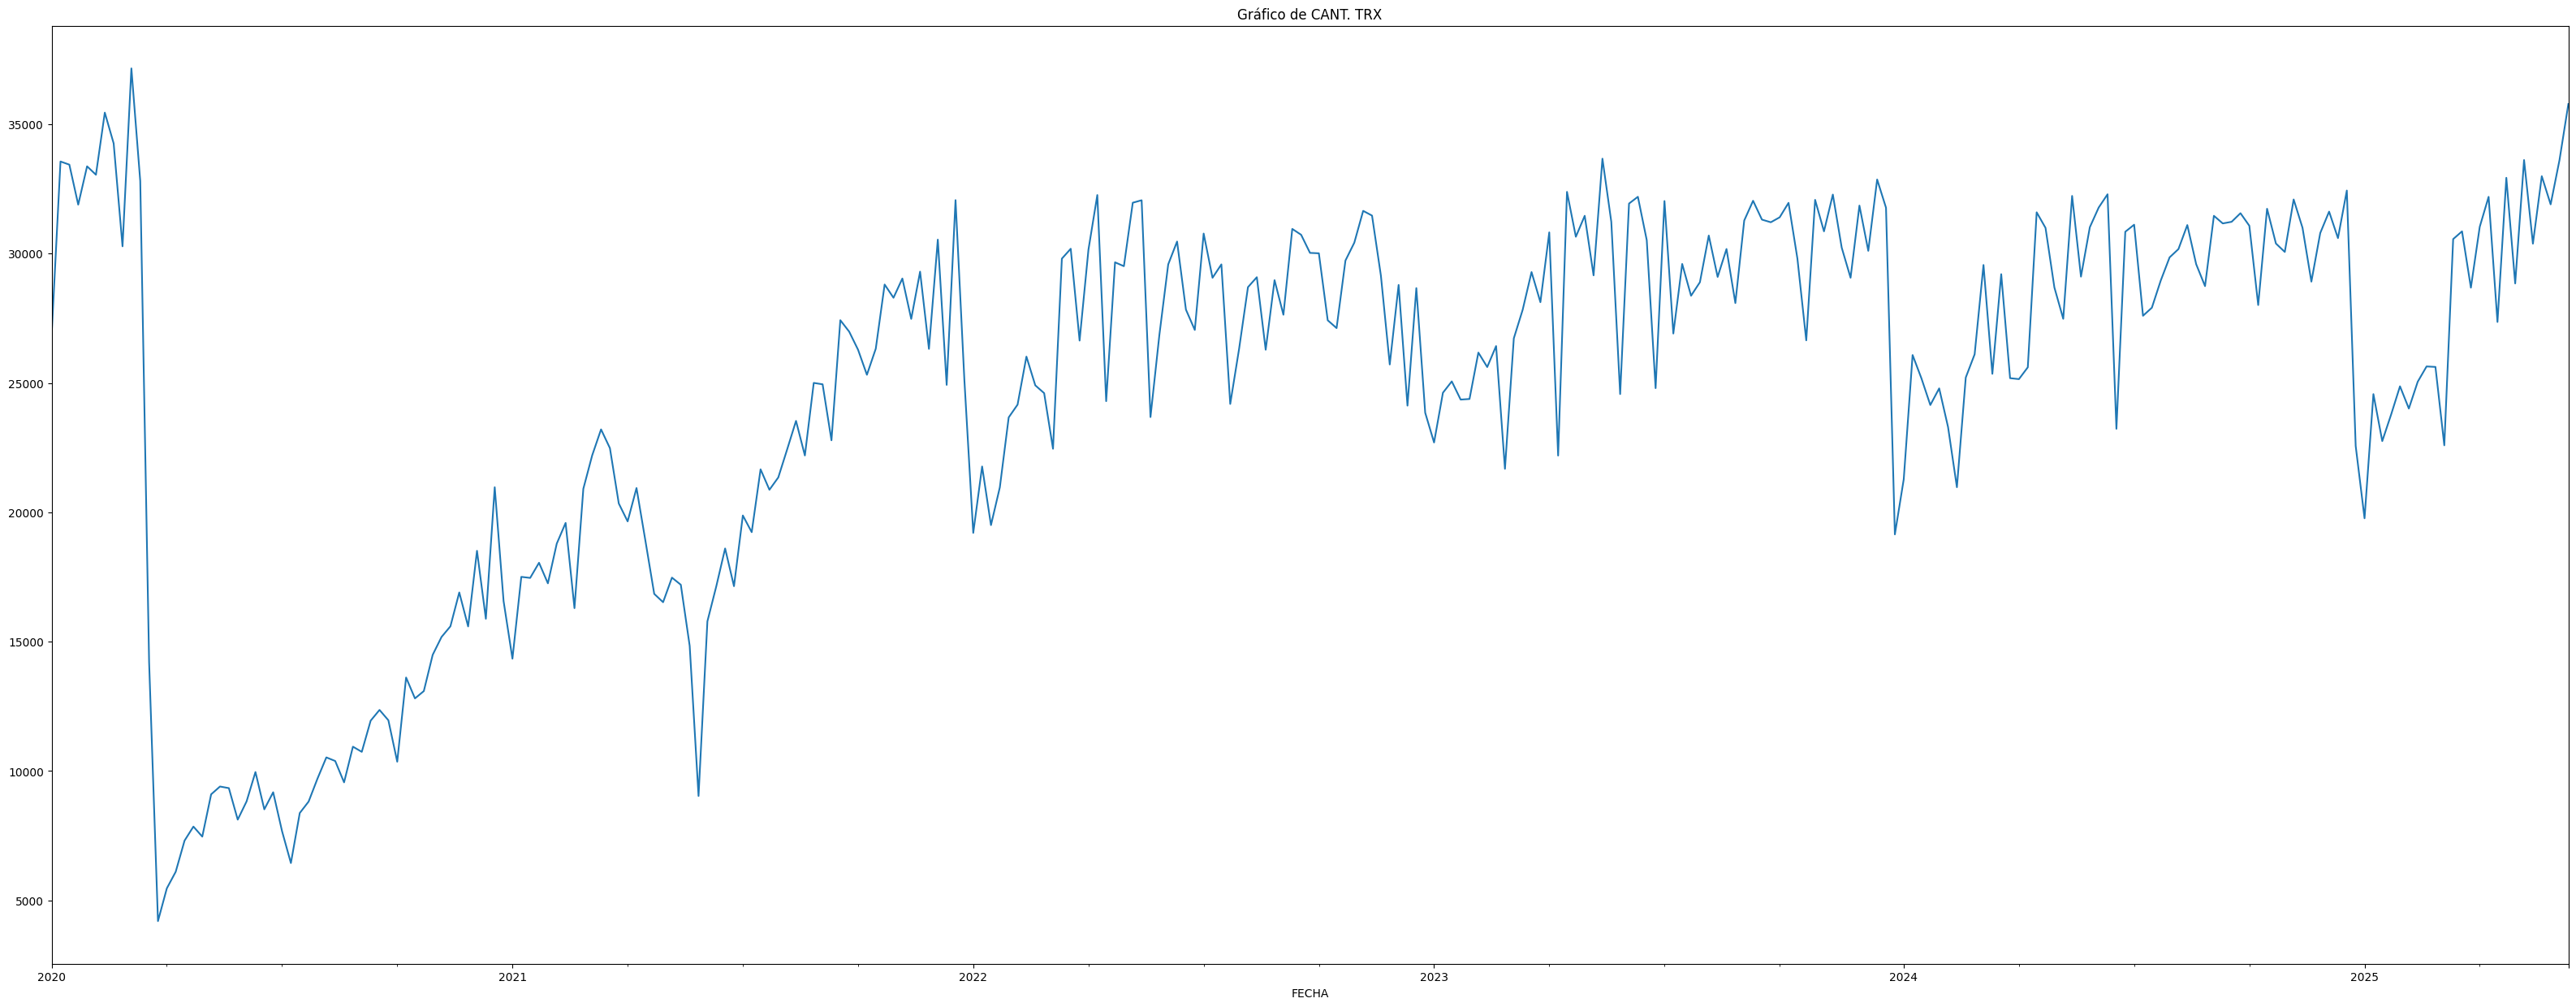

In [351]:
df_new = df_lista[0]['CANT. TRX'].resample(rule='W').mean()
df_new.plot(title="Gráfico de CANT. TRX", figsize=(40, 15))
plt.show()

De los gráficos previos el más interpretable es el de periocidad semanal, así que tomamos este como referencia para ahora graficar para todas las líneas.

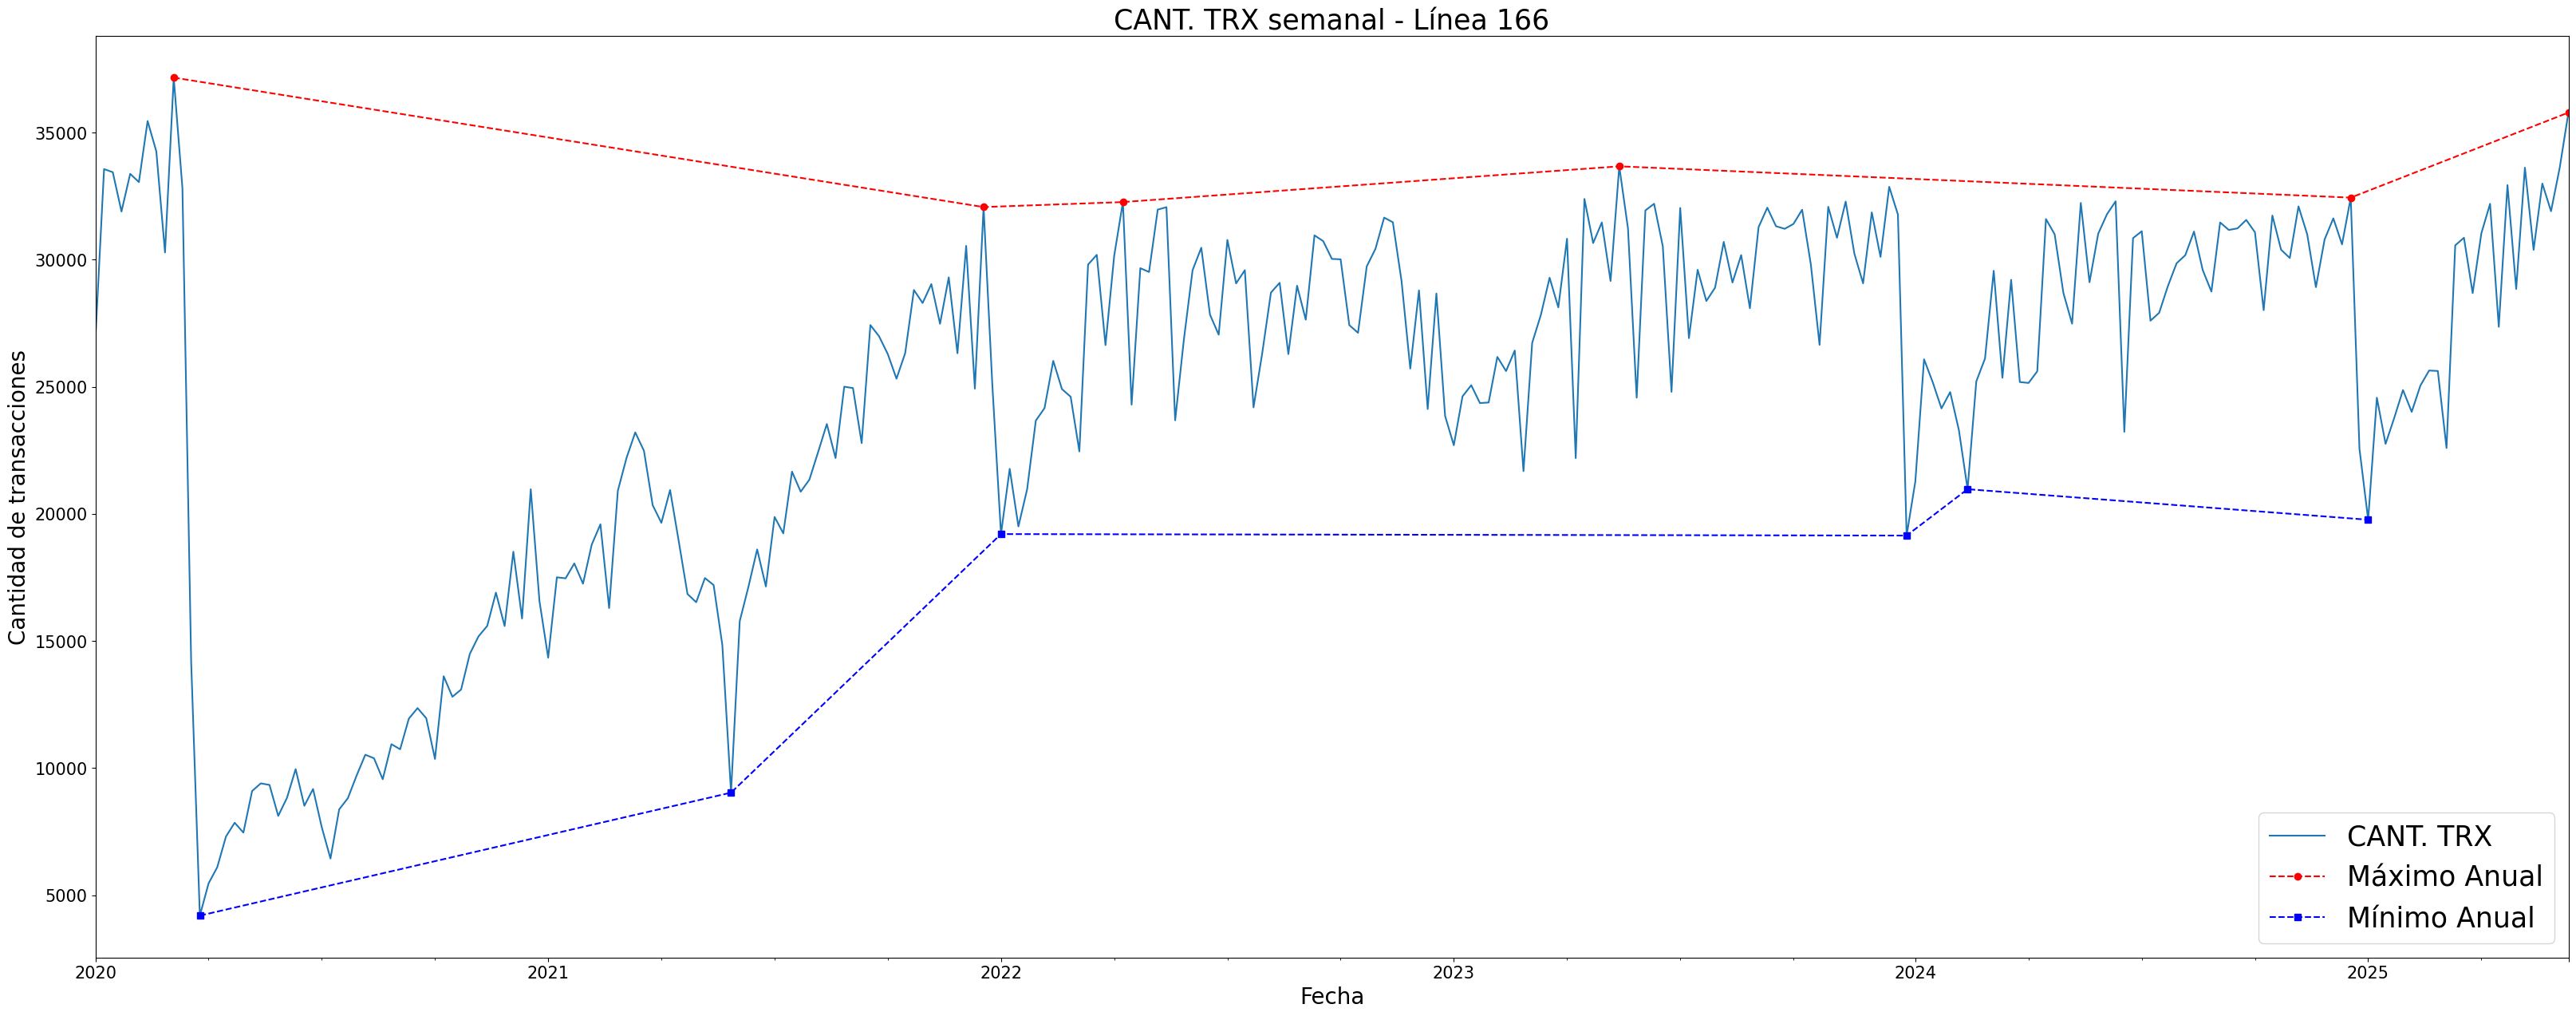

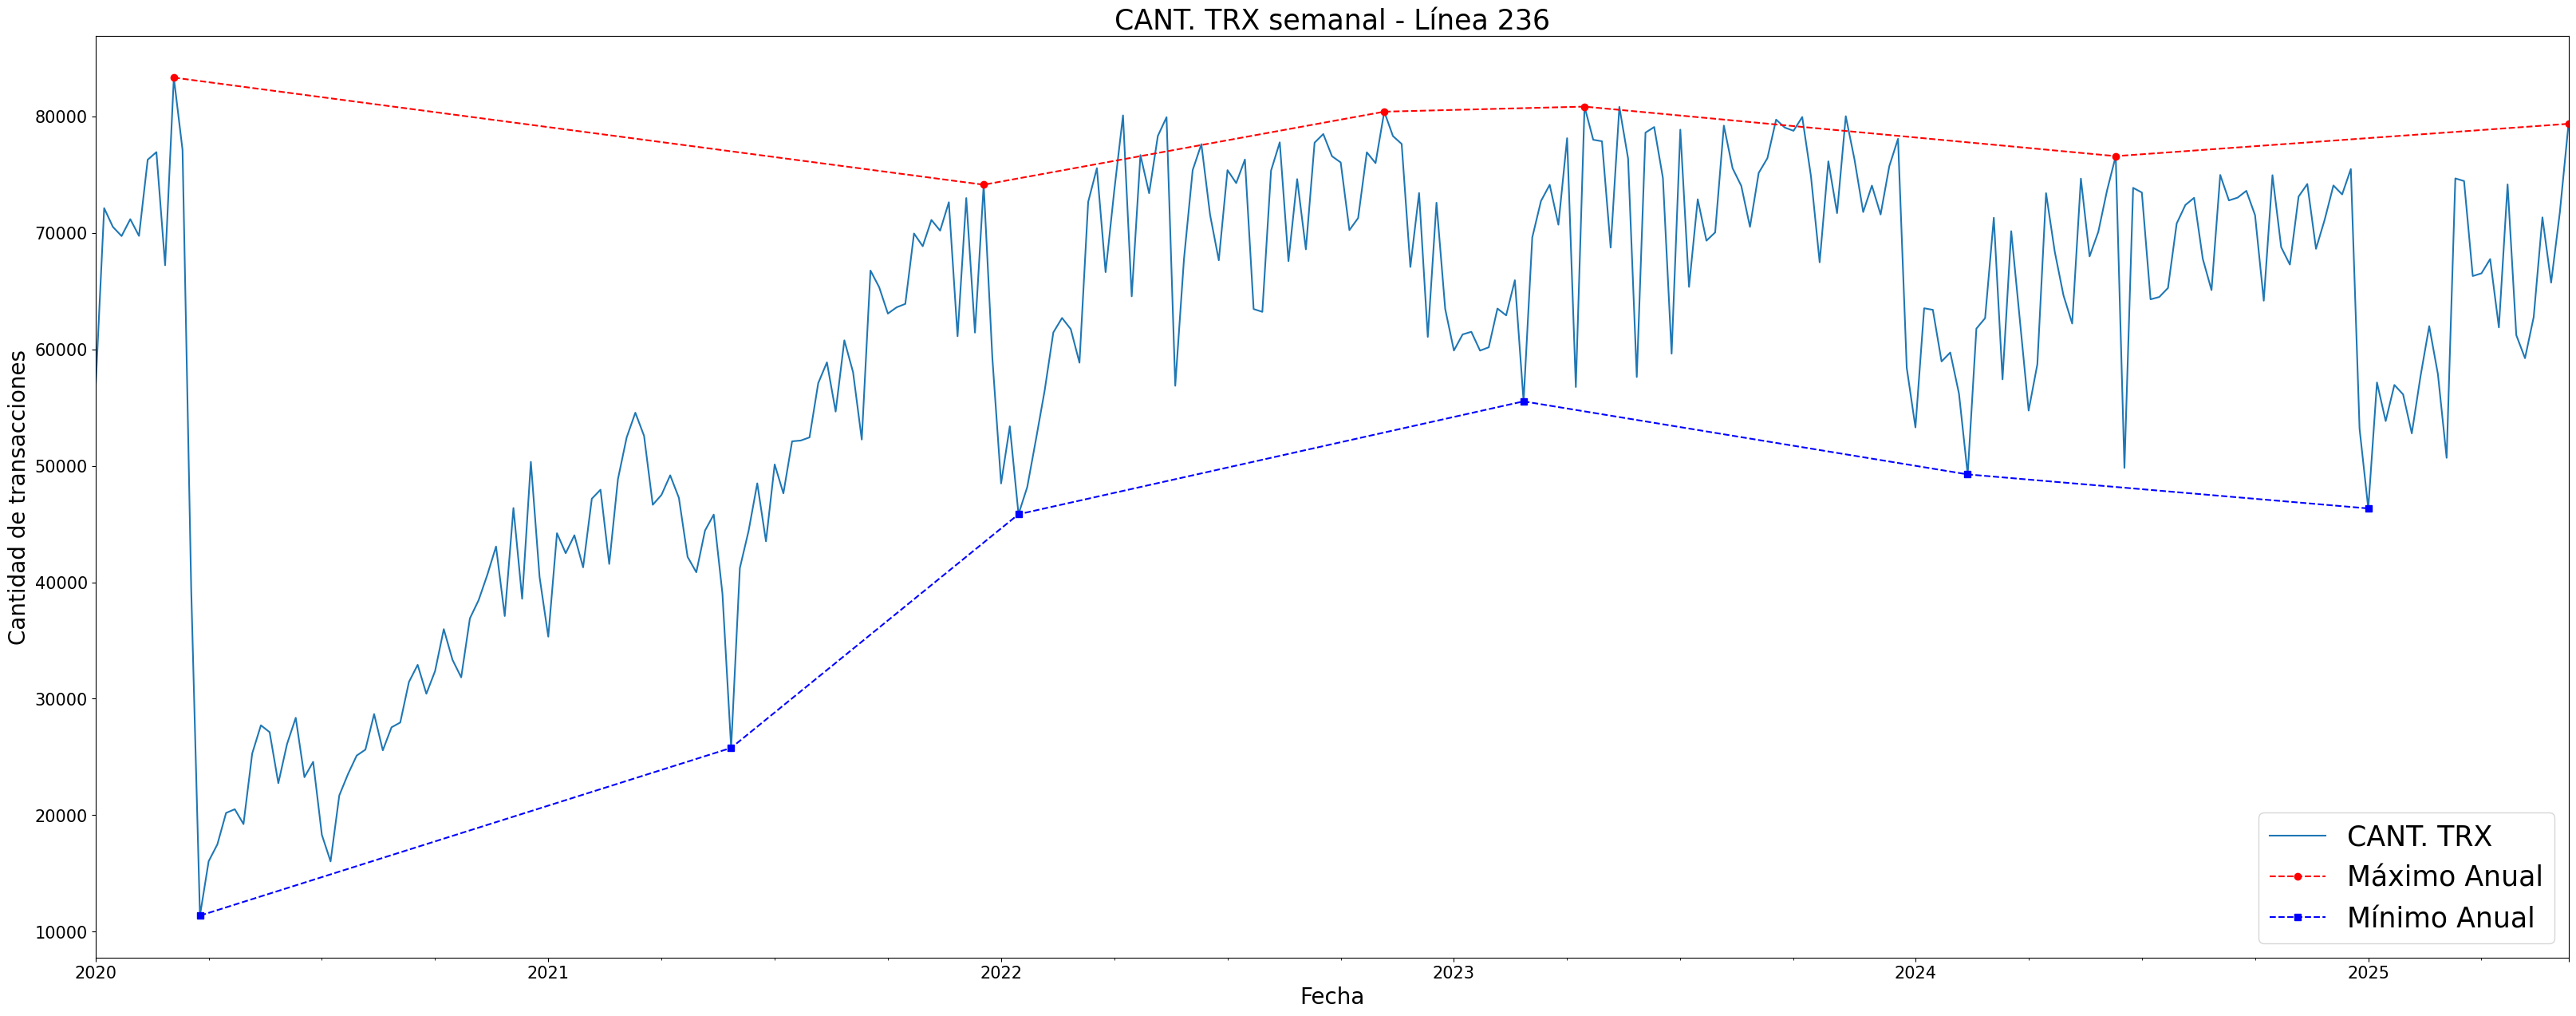

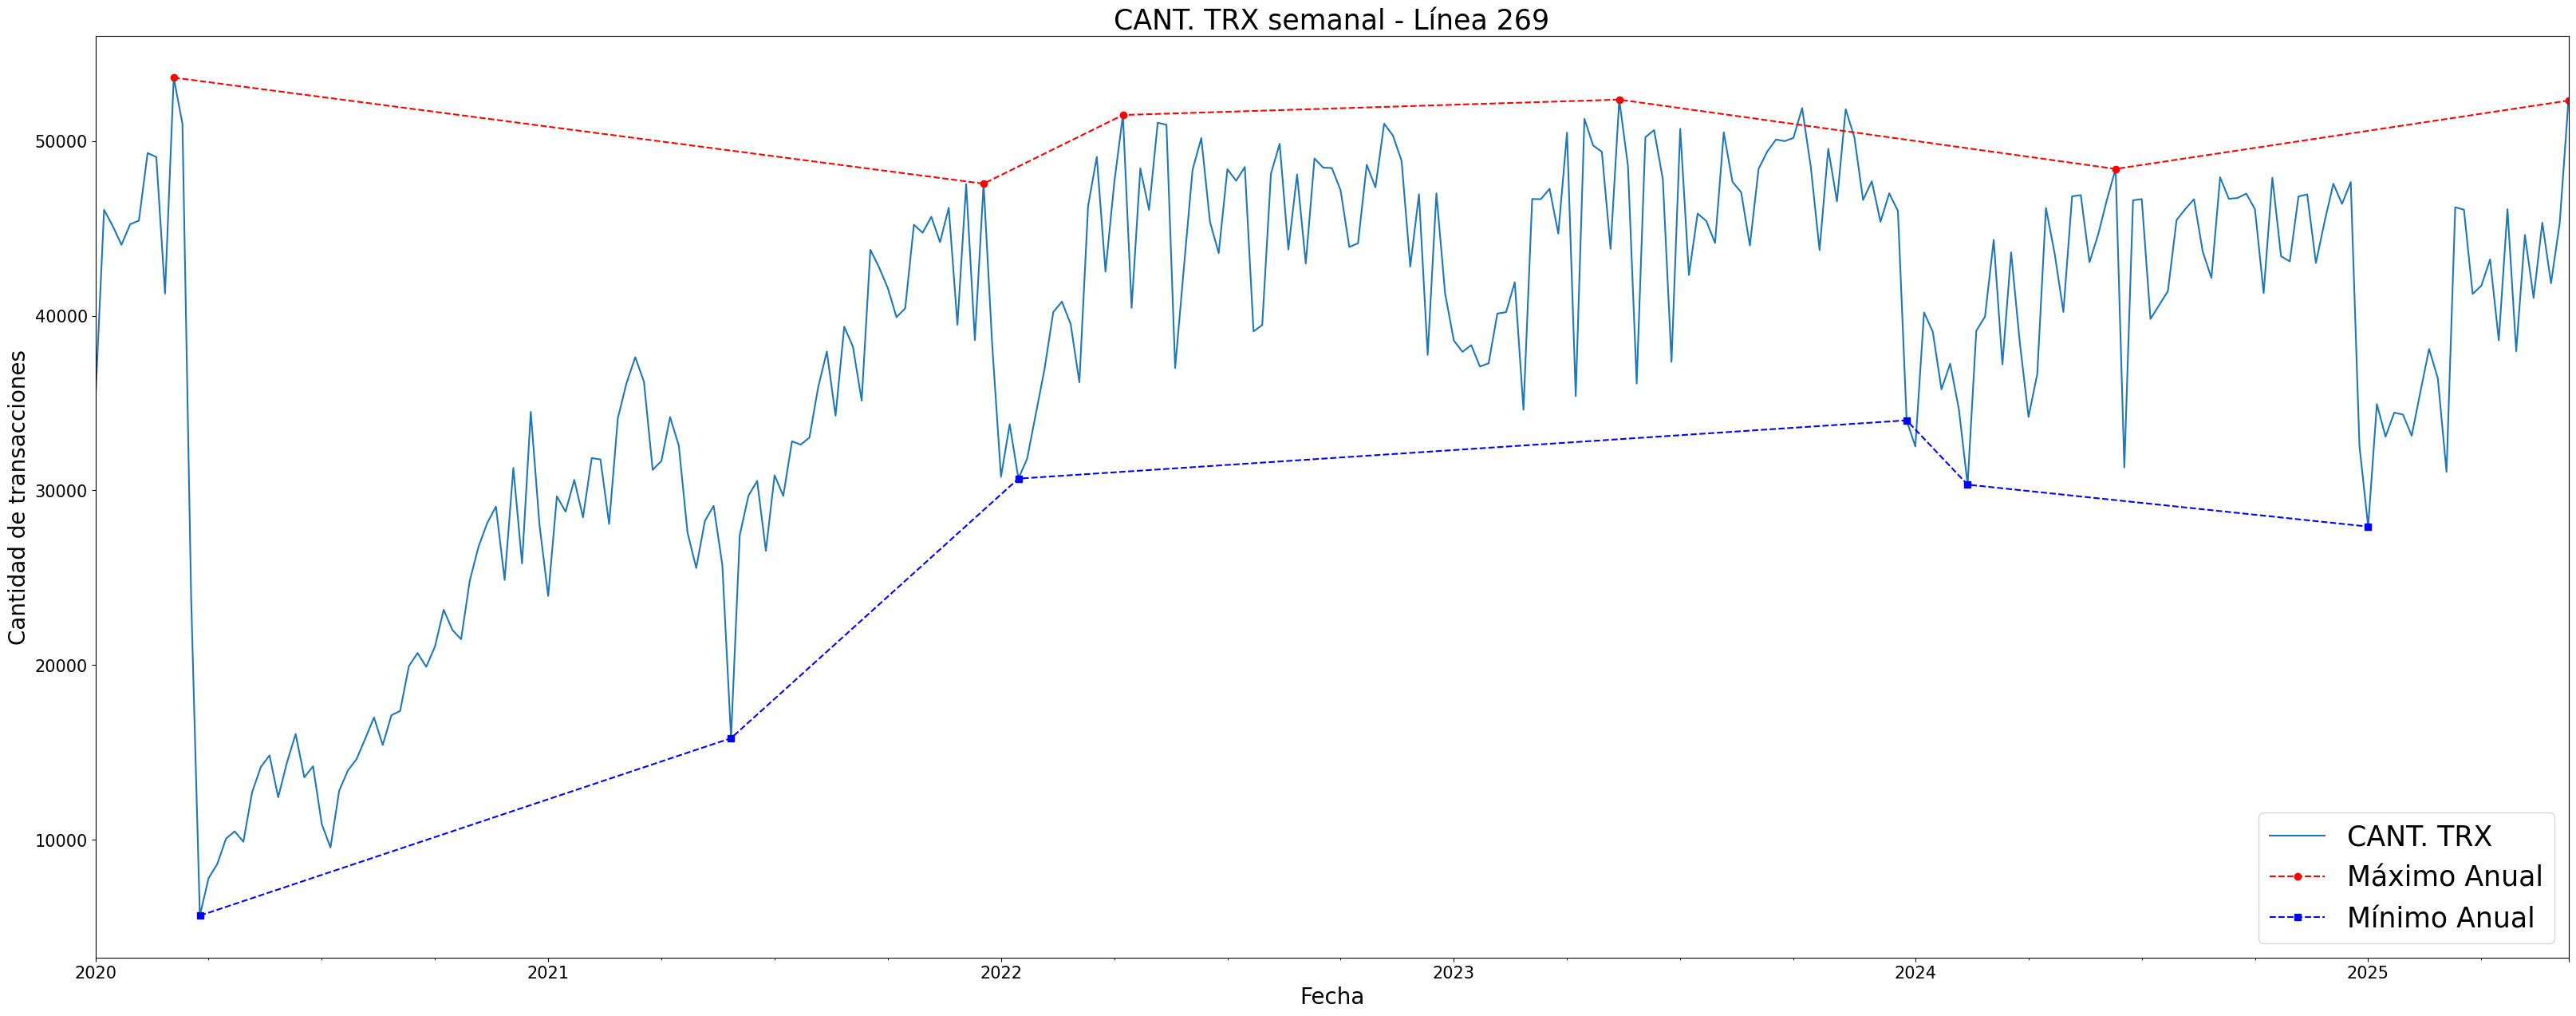

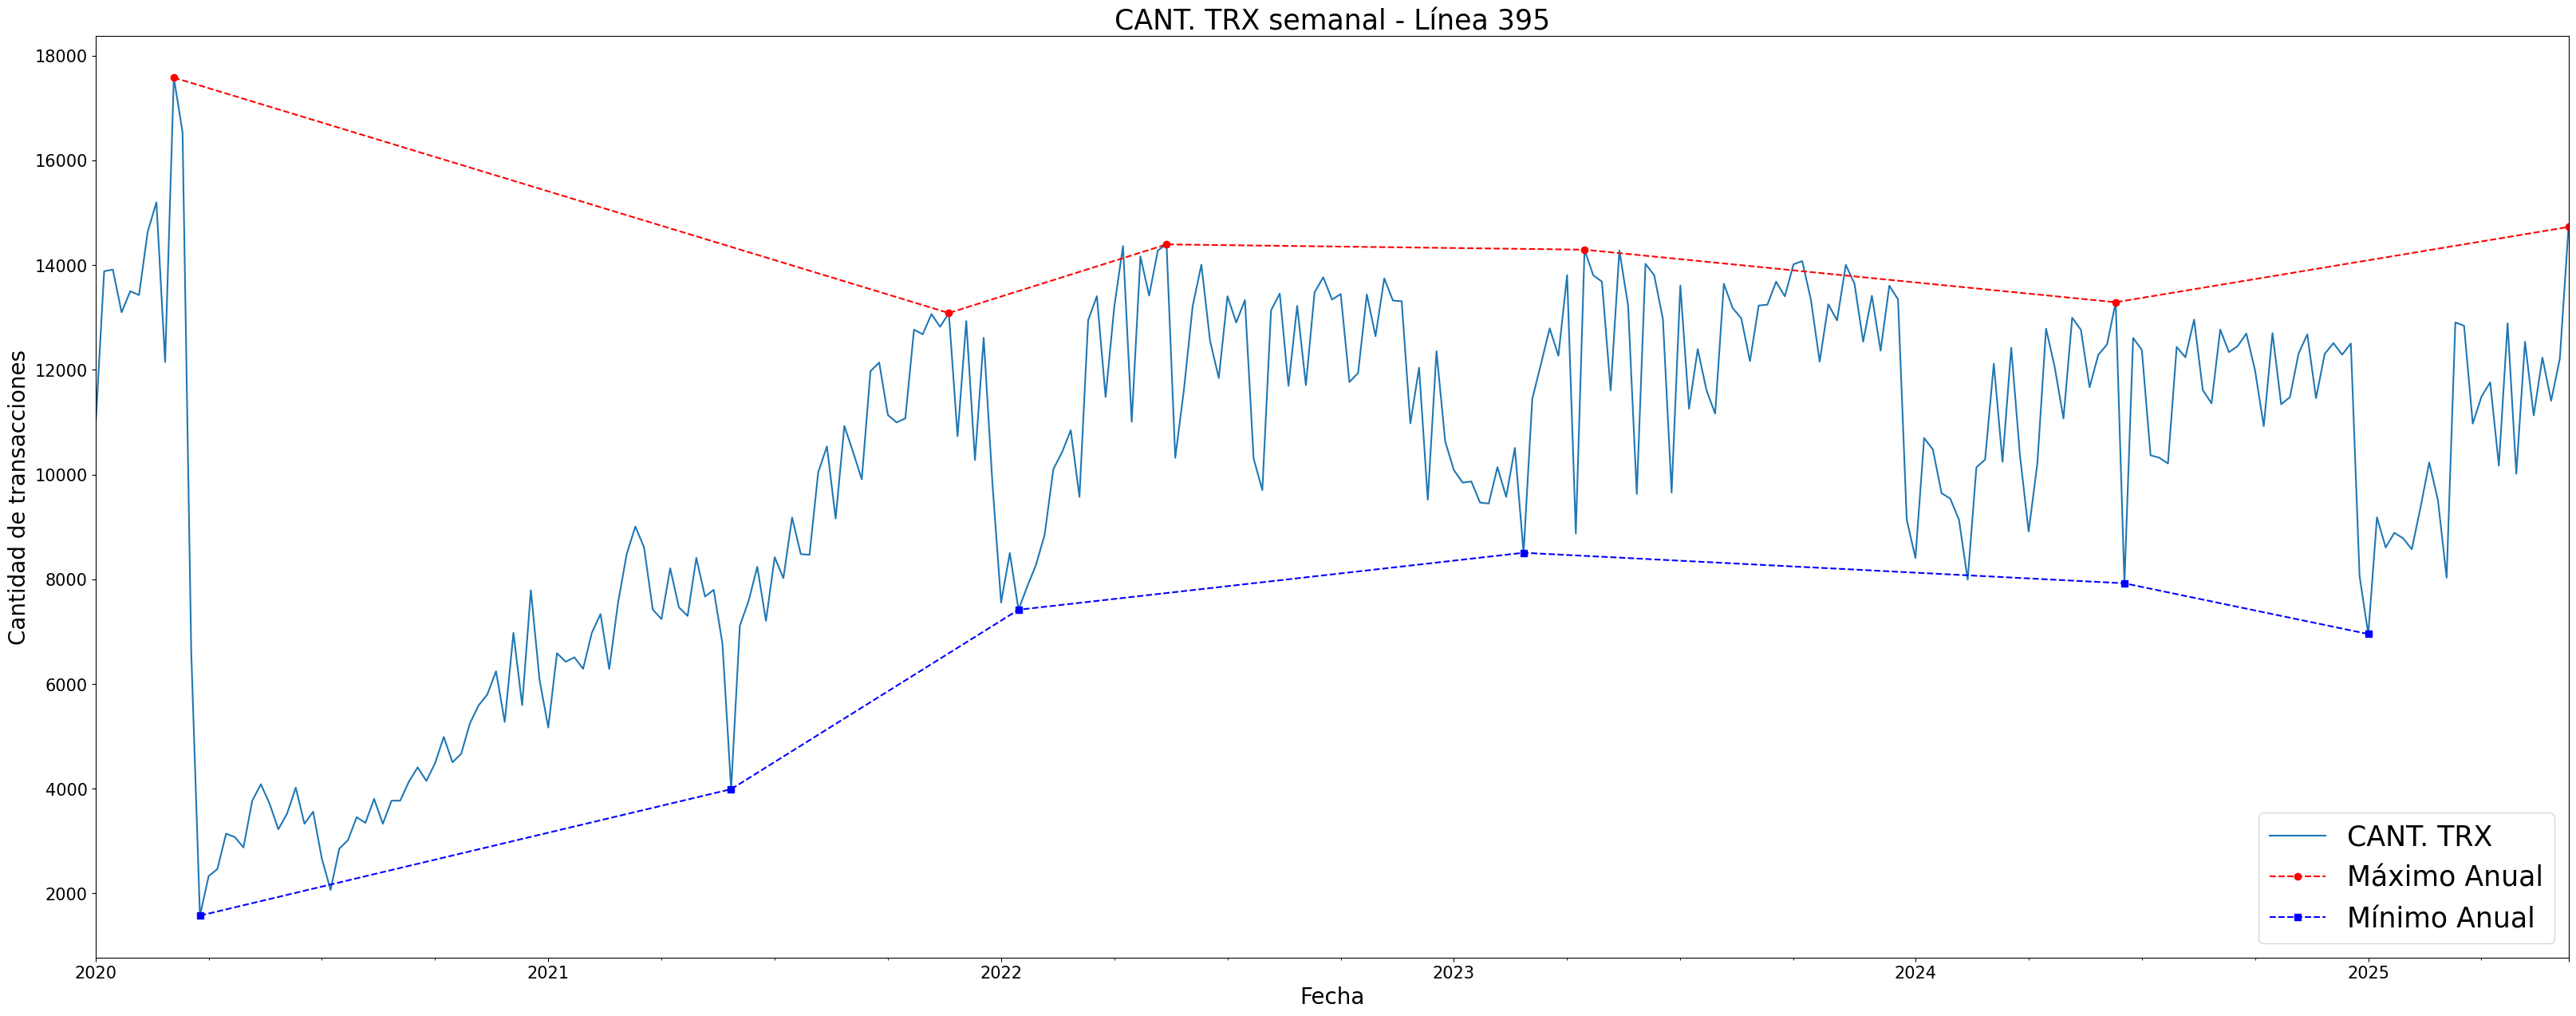

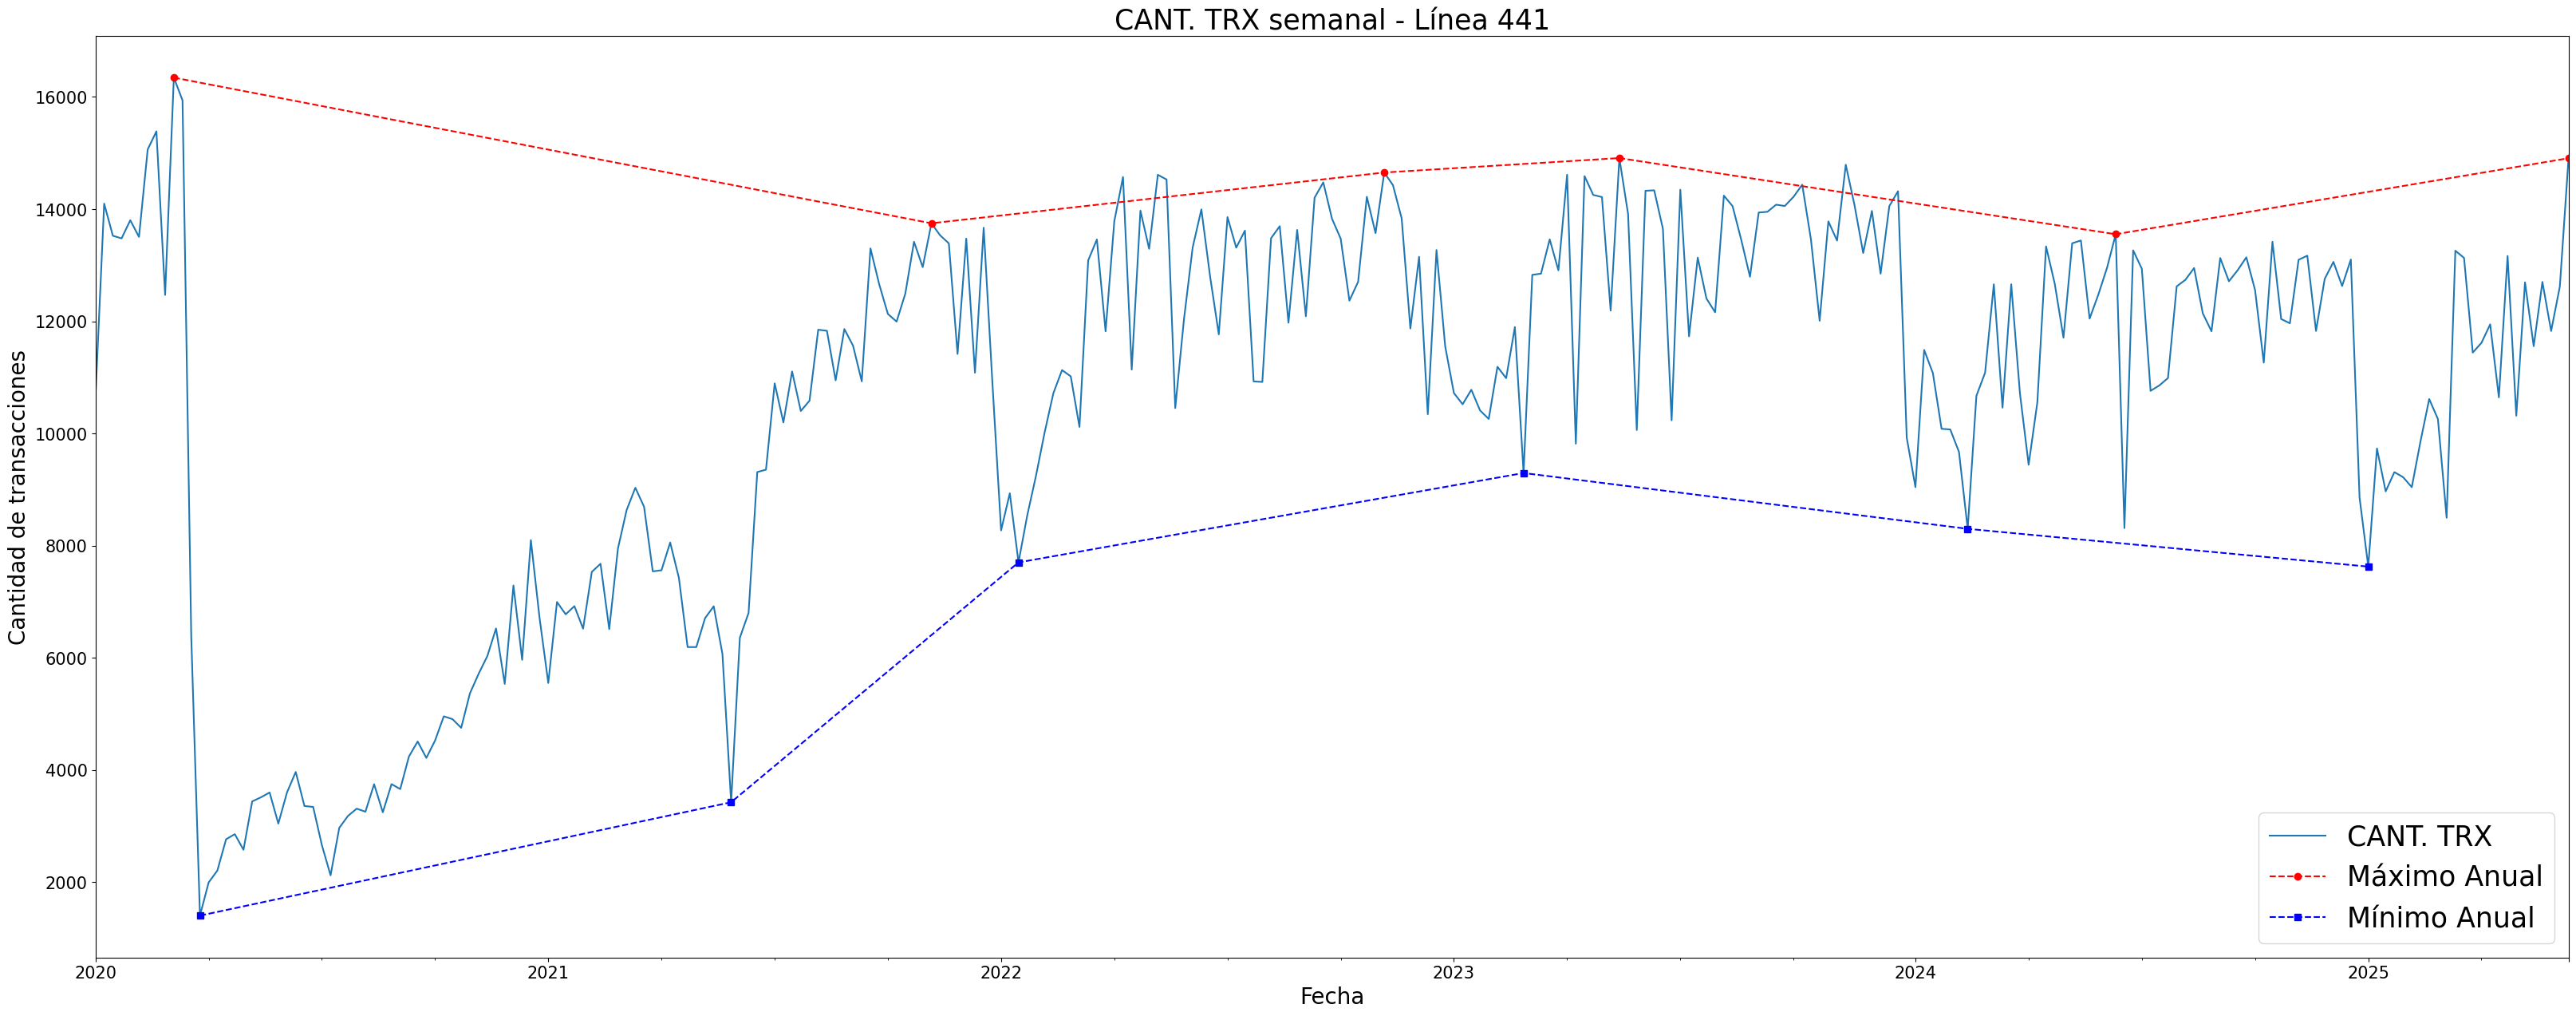

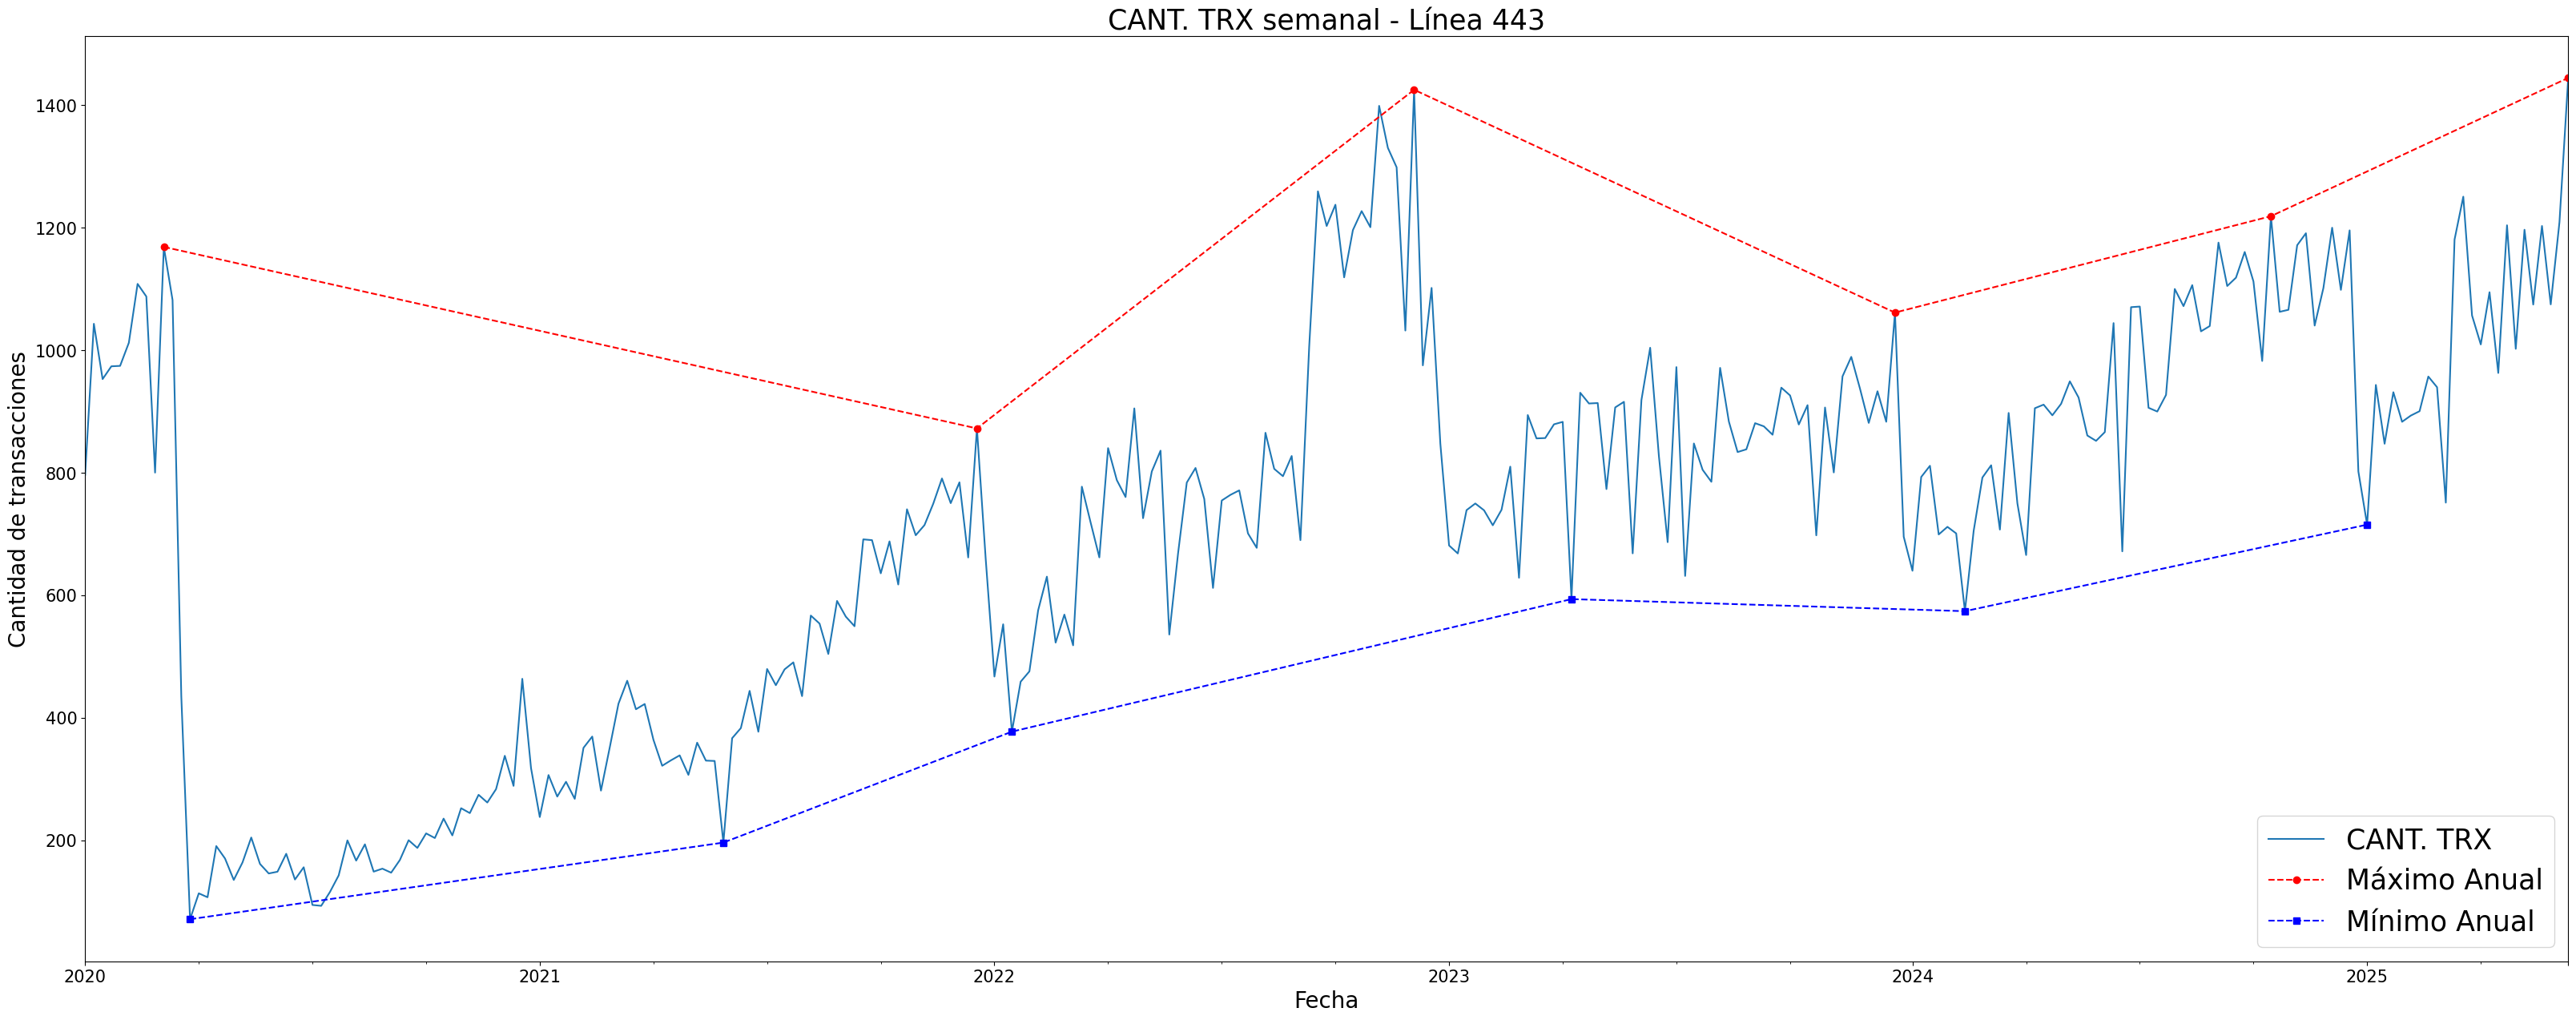

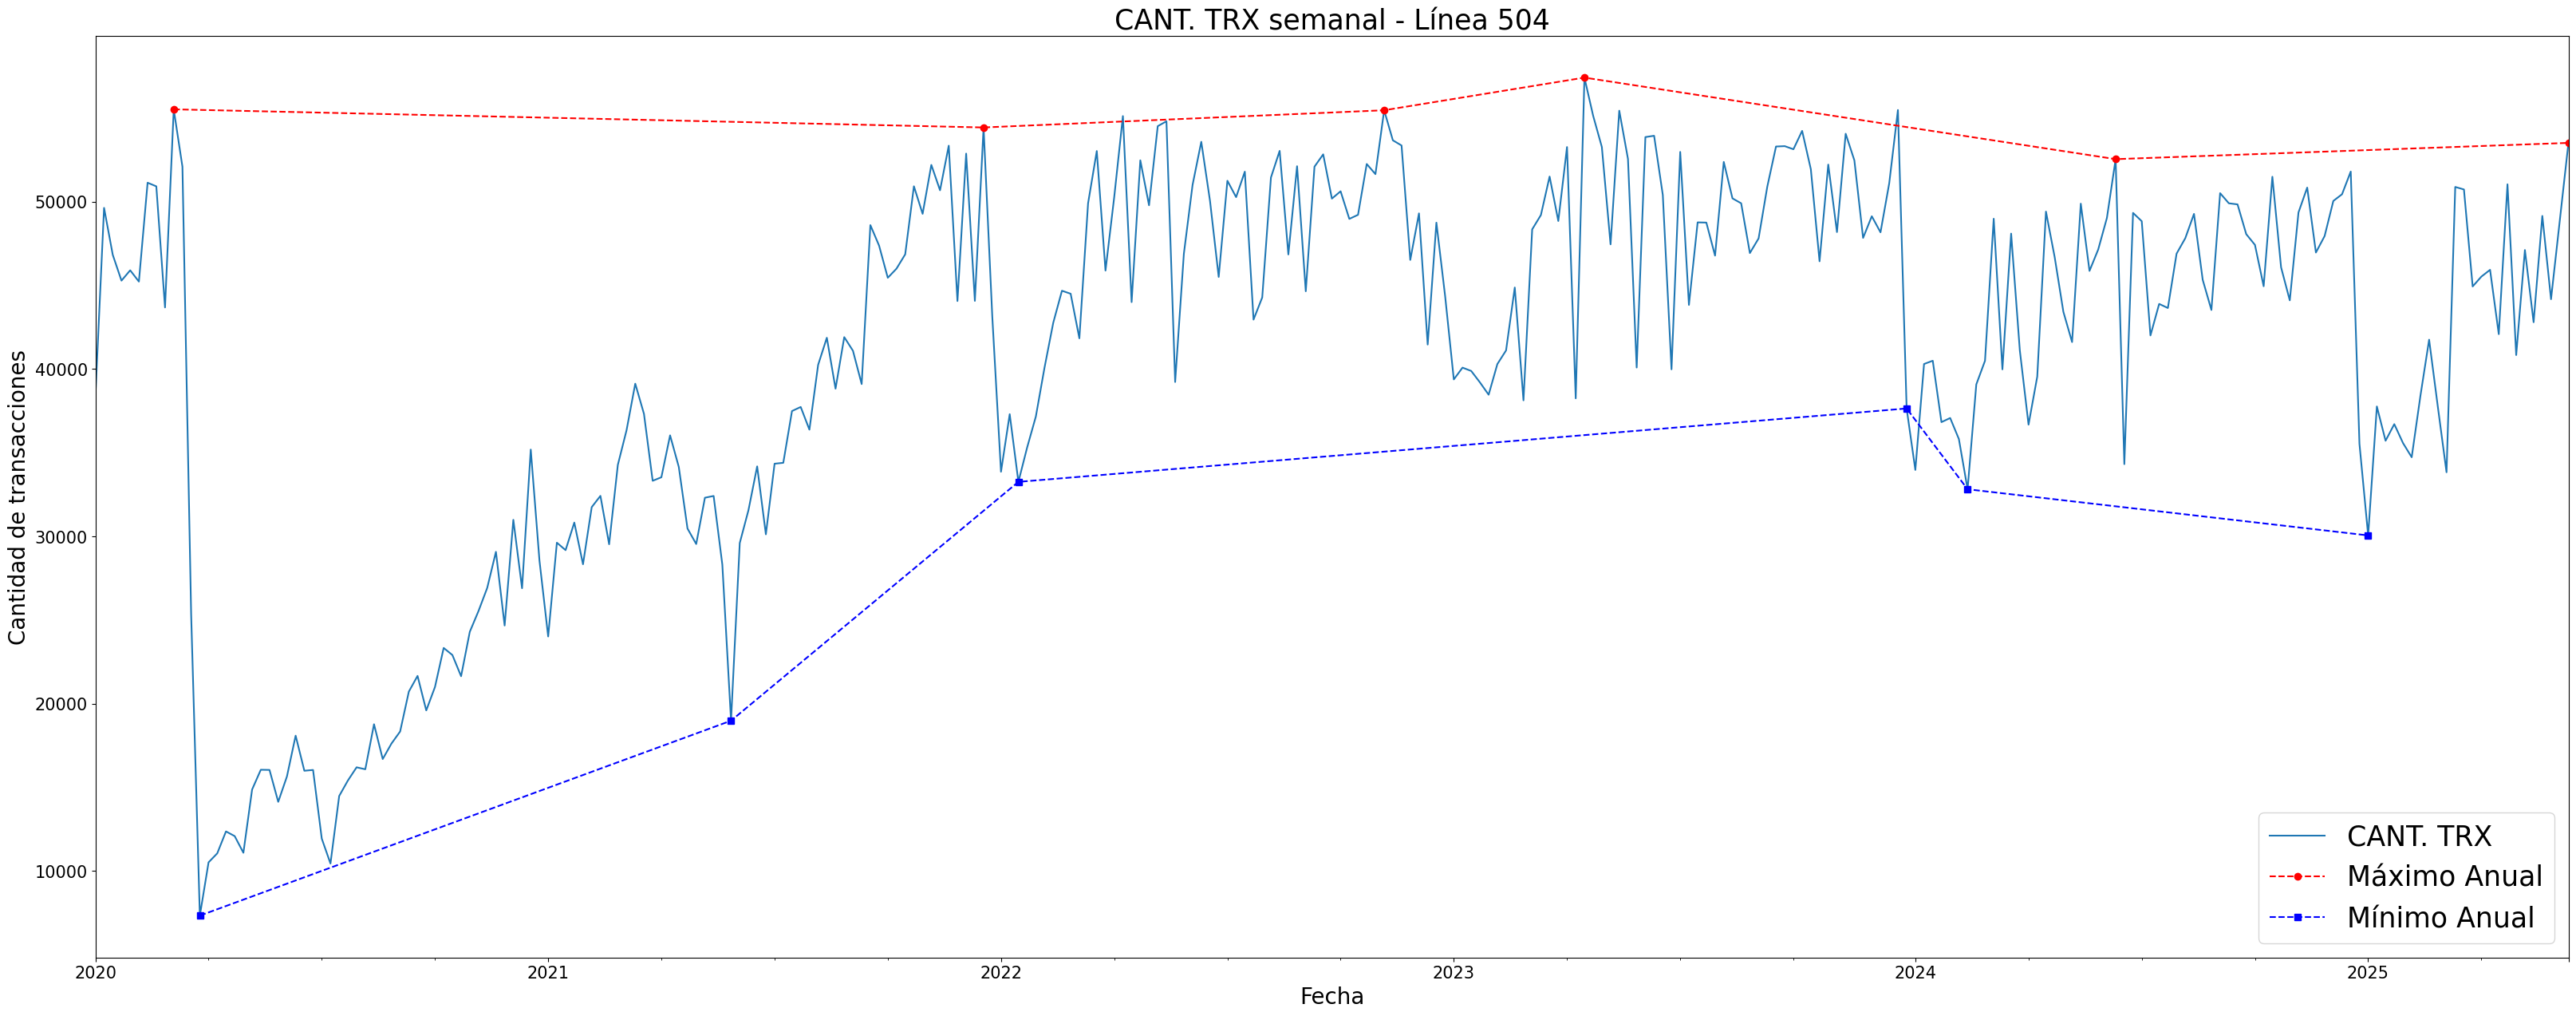

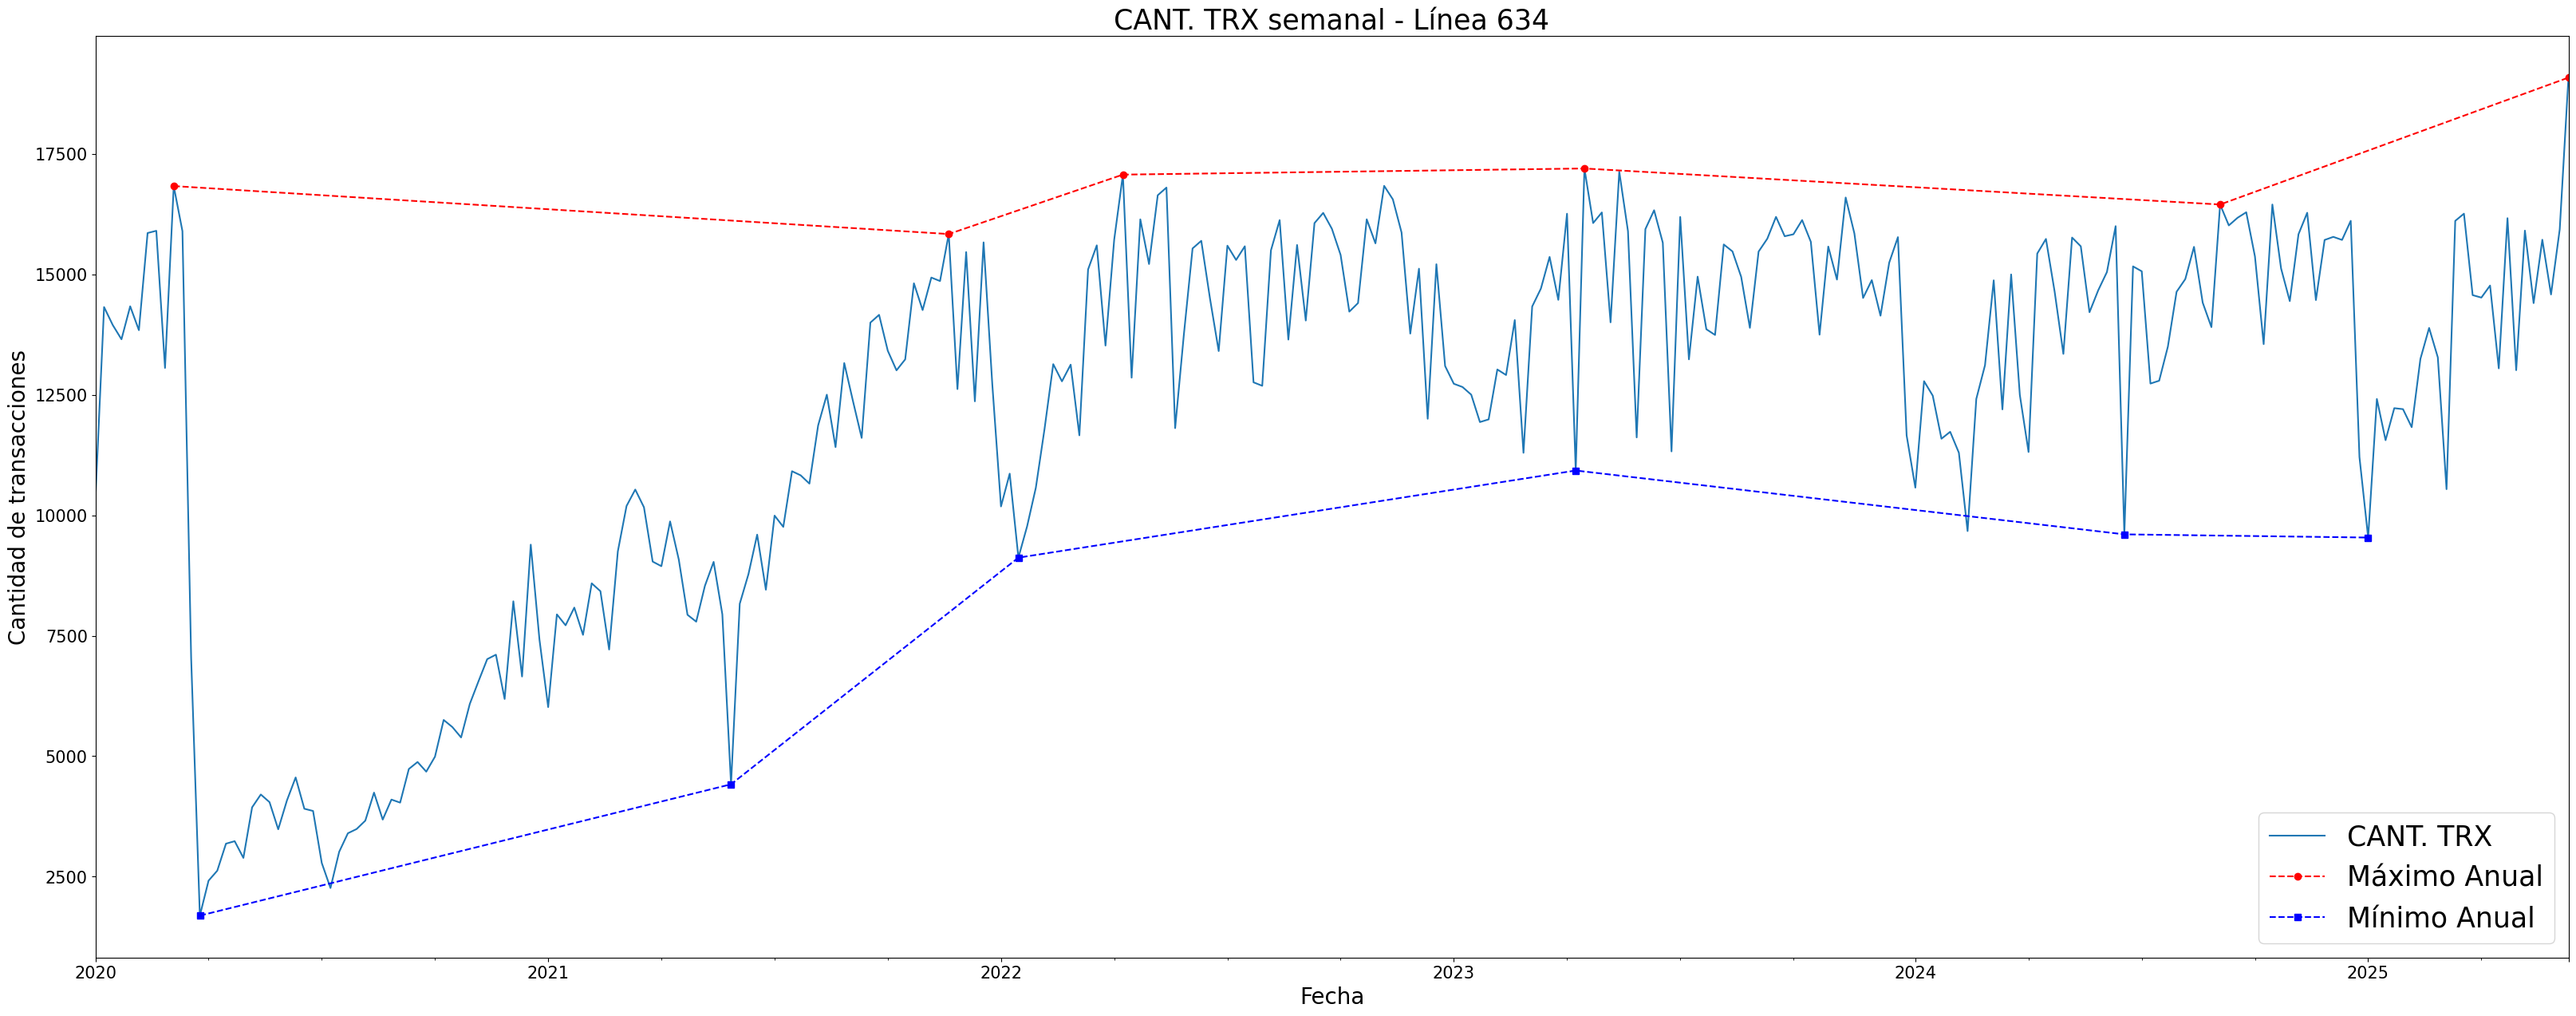

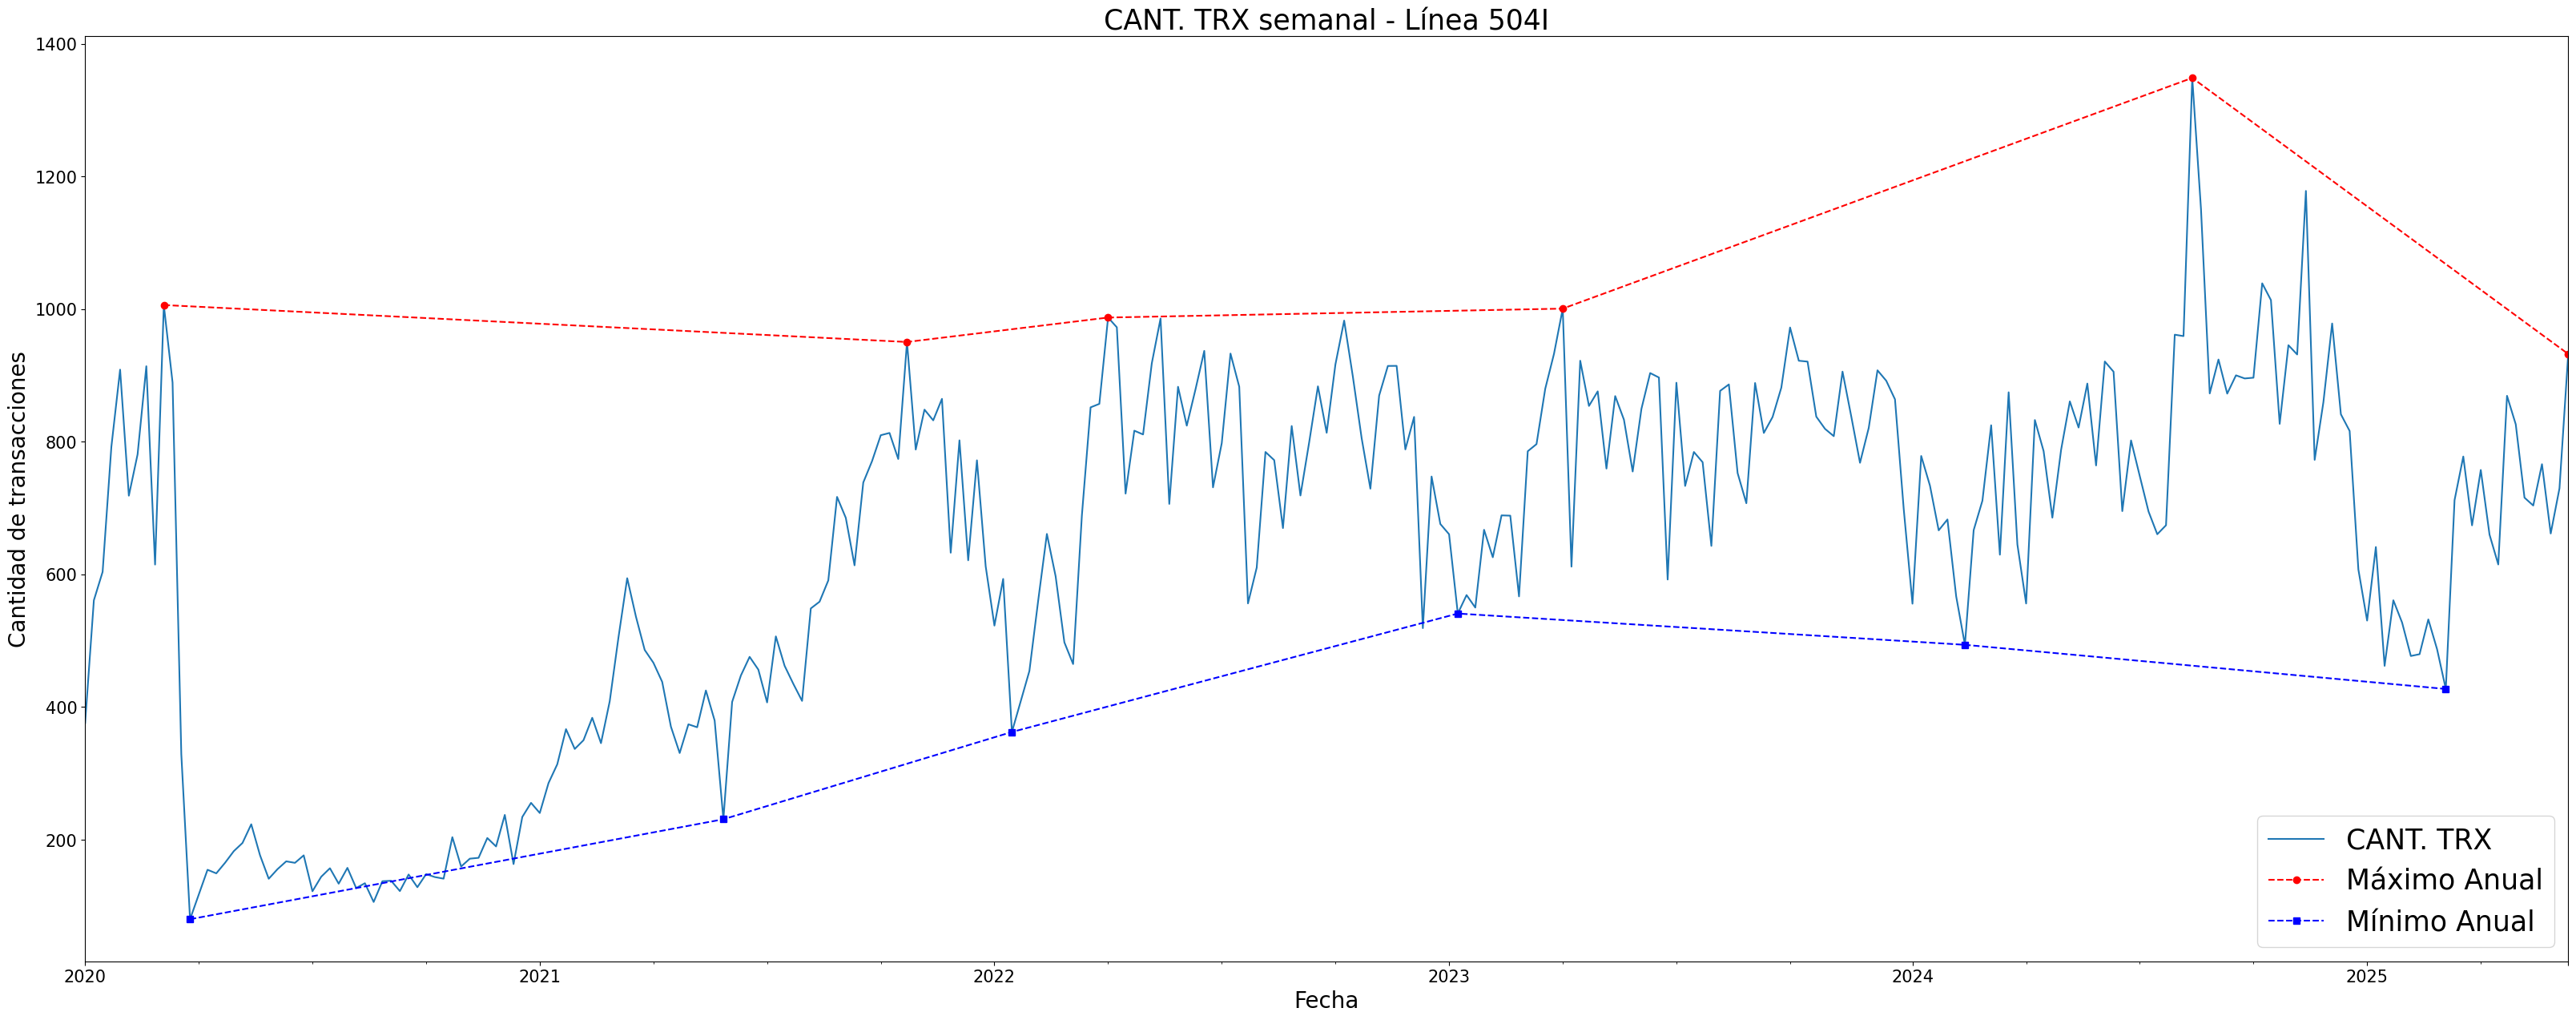

In [352]:
for df_linea in df_lista:
    fig, ax = plt.subplots(figsize=(40, 15))

    df_new = df_linea['CANT. TRX'].resample(rule='W').mean()
    df_new.plot(ax=ax)
    
    # Calcular extremos anuales
    # Agrupar por año y obtener fechas exactas del máximo y mínimo
    max_dates = df_new.groupby(df_new.index.year).idxmax()
    min_dates = df_new.groupby(df_new.index.year).idxmin()

    # Obtener los valores en esas fechas
    max_vals = df_new.loc[max_dates]
    min_vals = df_new.loc[min_dates]

    # Superponer en el mismo gráfico
    max_vals.plot(ax=ax, style='o--', label='Máximo Anual', color='red')
    min_vals.plot(ax=ax, style='s--', label='Mínimo Anual', color='blue')

    ax.set_title(f"CANT. TRX semanal - Línea {df_linea['LINEA'].iloc[0]}", fontsize=25)
    ax.set_xlabel("Fecha", fontsize=20)
    ax.set_ylabel("Cantidad de transacciones", fontsize=20)

    # Tamaño de ticks en los ejes
    ax.tick_params(axis='both', labelsize=15)

    # Mostrar la leyenda
    ax.legend(loc='lower right', fontsize=25)
    plt.show()

Como se puede observar en todas las líneas hay un patrón claro entre el año 2020 y 2021, esto se puede interpretar que está directamente relacionado con el inicio de la pandemia y las restricciones de movilidad debido a la cuarentena. Por lo tanto, sería pertinente a la hora de entrenar modelos excluir estos años y considerar a partir del 2022.

## **Análisis y transformación de datos**

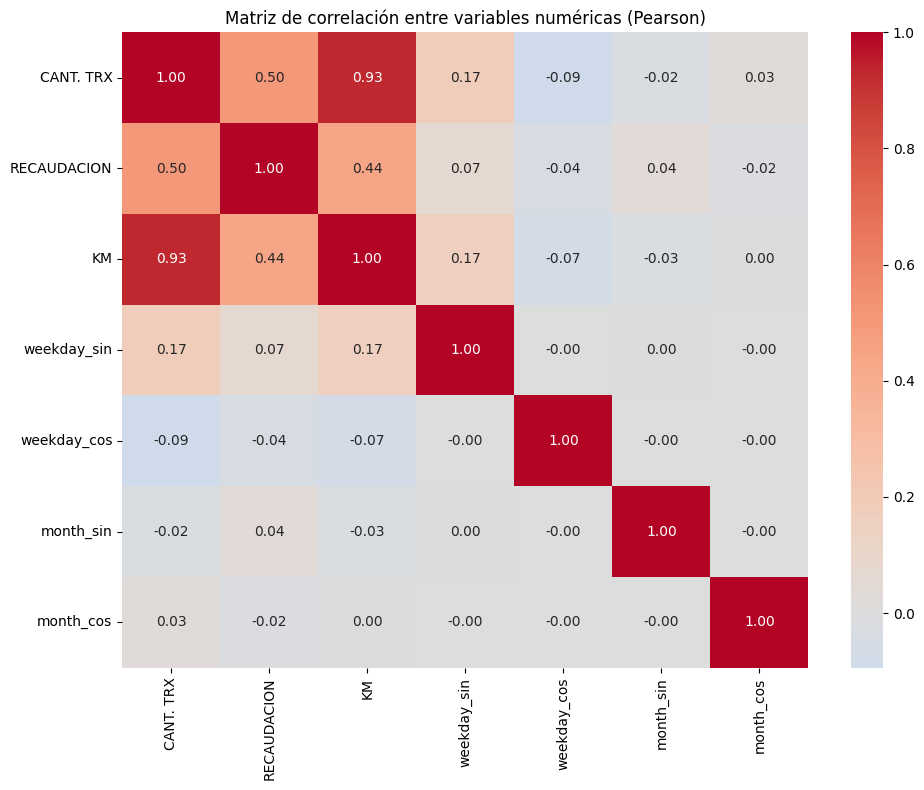

In [353]:
correlaciones = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas (Pearson)')
plt.tight_layout()
plt.show()

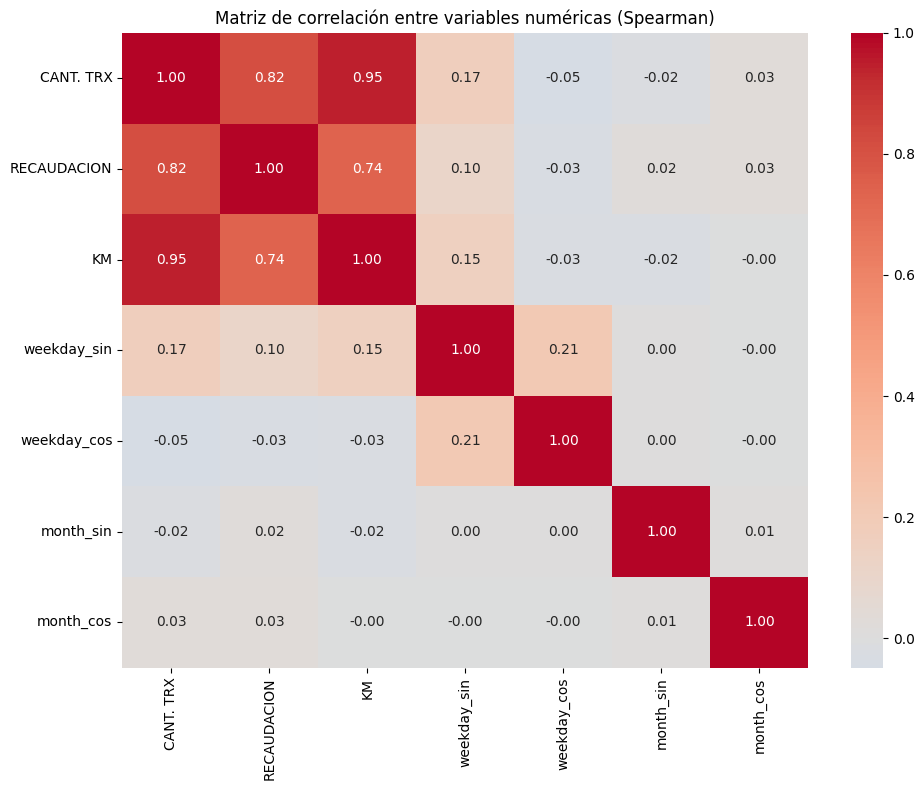

In [354]:
correlaciones = df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas (Spearman)')
plt.tight_layout()
plt.show()

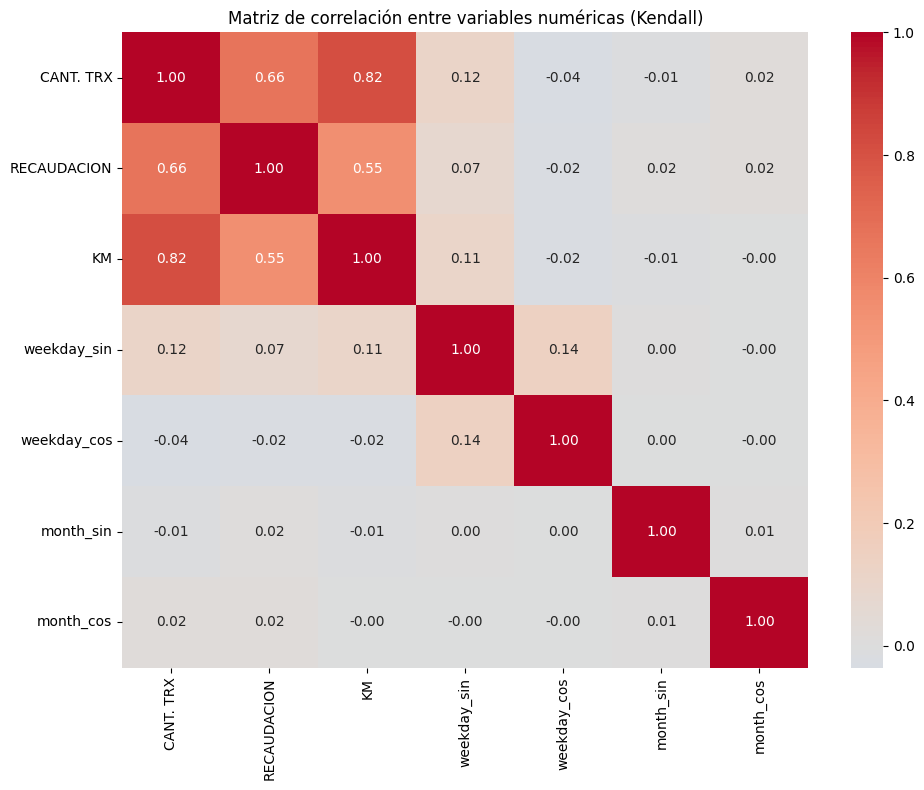

In [355]:
correlaciones = df.corr(method='kendall', numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas (Kendall)')
plt.tight_layout()
plt.show()

Como parte del análisis de los features podemos observar que hay una relación lineal muy fuerte entre CANT. TRX y KM, aunque por el lado de la RECAUDACION no hay una relación lineal tan fuerte como en las anteriores. Esto último puede deberse a que la recaudación no está ajustada por inflación, pudiendo darse situaciones en que la recaudación es mayor pero la cantidad de transacciones y los kilómetros es mucho menor.

### **Transformación de variables categóricas (línea) con One-Hot Ecoding**

In [356]:
# aplica one-hot encoding a la columna 'LINEA'
df = pd.get_dummies(df, columns=['LINEA'], drop_first=True)

### **División entre entrenamiento y test**

In [357]:
X = df.drop(columns=['FECHA', 'CANT. TRX', 'nombre_dia', 'nombre_mes'])  # Eliminar columnas no predictoras
y = df['CANT. TRX']

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

### **Transformación de variables numéricas**

In [359]:
columnas = ['RECAUDACION', 'KM']

scaler = StandardScaler()
# Entreno el scaler con los datos de entrenamiento
X_train[columnas] = scaler.fit_transform(X_train[columnas])

#transformo los datos de test con el scaler entrenado
X_test[columnas] = scaler.transform(X_test[columnas])

In [360]:
X_train.head()

RECAUDACION        KM  weekday_sin  weekday_cos  month_sin  \
1175     -0.211187  0.647127     0.781831     0.623490   1.000000   
14572    -0.442648 -0.823773     0.000000     1.000000  -0.866025   
3409      0.302839  2.490121     0.781831     0.623490  -0.500000   
11883    -0.347982 -1.027072     0.781831     0.623490   0.866025   
12762    -0.275987  0.935338    -0.433884    -0.900969   0.866025   

          month_cos  LINEA_236  LINEA_269  LINEA_395  LINEA_441  LINEA_443  \
1175   6.123234e-17      False      False      False      False      False   
14572  5.000000e-01      False      False      False      False      False   
3409   8.660254e-01       True      False      False      False      False   
11883 -5.000000e-01      False      False      False      False       True   
12762 -5.000000e-01      False      False      False      False      False   

       LINEA_504  LINEA_504I  LINEA_634  
1175       False       False      False  
14572      False       False       True  
3409       False       False      False  
11883      False       False      False  
12762       True       False      False

## **Entrenamiento de modelos**

Para predecir la demanda futura en la empresa se seleccionaron cinco modelos de regresión supervisada adecuados para datos tabulares enriquecidos con variables cíclicas y categóricas. 

1. **Regresión Lineal:** La regresión lineal se incluyó como modelo base por su simplicidad e interpretabilidad, útil para establecer una línea de comparación.

2. **Random Forest:** Además de capturar relaciones no lineales mejora su rendimiento reduciendo el sobreajuste mediante un ensamble de múltiples árboles.

3. **Decission Tree:** El árbol de decisión permite capturar relaciones no lineales de forma transparente.

4. **XGBoost:** Reconocido por su alta precisión y eficiencia, se utilizó por su capacidad de modelar interacciones complejas y controlar el sobreajuste mediante técnicas de boosting. 

5. **Support Vector Regressor (SVR):** Se integró como alternativa basada en márgenes y funciones kernel, lo cual aporta una perspectiva diferente en problemas no lineales. 

La combinación de estos modelos ofrece un enfoque robusto y comparativo, permitiendo evaluar el comportamiento de diferentes técnicas ante la complejidad temporal y estructural del problema.

In [361]:
def evaluate_model(y_test, y_pred):
    print("R²:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", root_mean_squared_error(y_test, y_pred))
    print("MAPE:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

### **Regresión Lineal**

In [362]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [363]:
y_pred = model.predict(X_test)

evaluate_model(y_test, y_pred)

R²: 0.8947207378410598
MAE: 4594.9880913670295
MSE: 55554547.07040244
RMSE: 7453.492273451583
MAPE: 488.2032186442058


### **Random Forest**

In [364]:
forest_model = RandomForestRegressor()

grid = GridSearchCV(
    forest_model,
    [{"max_depth": [i+1 for i in range(30)]}],
    refit=True,
    cv=5,
    scoring='r2',
    n_jobs=-1,     # usa todos los cores disponibles
    verbose=2      # para ver progreso
)

resultGS = grid.fit(X_train, y_train)
#Recogemos los resultados
print('Best Score: %s' % resultGS.best_score_)
print('Best Hyperparameters: %s' % resultGS.best_params_)

forest_model = grid.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.6s
[CV] END ........................................max_depth=1; total time=   0.7s
[CV] END ........................................max_depth=1; total time=   0.7s
[CV] END ........................................max_depth=2; total time=   1.1s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.2s
[CV] END ........................................max_depth=2; total time=   1.4s
[CV] END ........................................max_depth=3; total time=   1.5s
[CV] END ......................................

In [365]:
y_pred = forest_model.predict(X_test)

evaluate_model(y_test, y_pred)

R²: 0.9937095371643303
MAE: 767.5942558828808
MSE: 3319398.3936859705
RMSE: 1821.921621169794
MAPE: 7.587969468956797


### **Decission Tree**

In [366]:
tree_model = DecisionTreeRegressor()

grid = GridSearchCV(
    tree_model,
    [{"max_depth": [i+1 for i in range(30)]}],
    refit=True,
    cv=5,
    scoring='r2',
    n_jobs=-1,     # usa todos los cores disponibles
    verbose=2      # para ver progreso
)

resultGS = grid.fit(X_train, y_train)
# Recogemos los resultados
print('Best Score: %s' % resultGS.best_score_)
print('Best Hyperparameters: %s' % resultGS.best_params_)

tree_model = grid.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ......................................

La siguiente celda es para visualizar el árbol generado, pero como la profundidad máxima fue de 28 la realidad es que el gráfico es difícil de interpretar por la superposición de diversos nodos.

In [373]:
# plt.figure(figsize=(20,10))
# plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
# plt.show()

In [368]:
y_pred = tree_model.predict(X_test)

evaluate_model(y_test, y_pred)

R²: 0.9887023597812117
MAE: 960.8302055406613
MSE: 5961623.138767873
RMSE: 2441.6435322888296
MAPE: 8.309084652158601


### **XGBoost**

In [369]:
xgb_modelo = xgb.XGBRegressor(learning_rate=0.1, random_state=42)


grid = GridSearchCV(
    xgb_modelo,
    [{"n_estimators": [i+1 for i in range(0, 30,5)], "max_depth": [i+1 for i in range(4,30,1)]}],
    refit=True,
    cv=5,
    scoring='r2',
    verbose=2  # para ver progreso
)

resultGS = grid.fit(X_train, y_train)
# Recogemos los resultados
print('Best Score: %s' % resultGS.best_score_)
print('Best Hyperparameters: %s' % resultGS.best_params_)

xgb_modelo = grid.best_estimator_

Fitting 5 folds for each of 156 candidates, totalling 780 fits
[CV] END ........................max_depth=5, n_estimators=1; total time=   0.1s
[CV] END ........................max_depth=5, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=5, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=5, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=5, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=5, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=5, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=5, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=5, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=5, n_estimators=6; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=5, n

In [370]:
y_pred = xgb_modelo.predict(X_test)

evaluate_model(y_test, y_pred)

R²: 0.9878130032367857
MAE: 1657.4926600997421
MSE: 6430925.440061472
RMSE: 2535.926939022785
MAPE: 194.5301440545737


### **Support Vector Regressor (SVR)**

In [371]:
svm_hitters = SVR()

grid = GridSearchCV(
    svm_hitters,
    [{"C": [0.01, 0.1, 1, 5, 10, 100], "kernel": ["linear"]},
        {"C": [0.01, 0.1, 1, 5, 10, 100], "gamma": [0.1, 0.5, 1, 2, 10, 100], "kernel": ["rbf", "sigmoid"]},
        {"C": [0.01, 0.1, 1, 5, 10, 100], "degree": [2, 3, 4, 5, 6], "kernel": ["poly"]}],
    refit=True,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=2 # para ver progreso
)
resultadosSVR = grid.fit(X_train,y_train)
# Recogemos los resultados
print('Best Score: %s' % resultadosSVR.best_score_)
print('Best Hyperparameters: %s' % resultadosSVR.best_params_)

svm_hitters = grid.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   1.8s
[CV] END ..............................C=0.01, kernel=linear; total time=   1.7s
[CV] END ..............................C=0.01, kernel=linear; total time=   1.8s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.8s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.7s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.7s
[CV] END .................................C=1, kernel=linear; total time=   1.7s
[CV] END .................................C=1, kernel=linear; total time=   1.7s
[CV] END .................................C=1, kernel=linear; total time=   1.7s
[CV] END .................................C=5, kernel=linear; total time=   1.6s
[CV] END .................................C=5, kernel=linear; total time=   1.7s
[CV] END .................................C=5,

In [372]:
y_pred = svm_hitters.predict(X_test)

evaluate_model(y_test, y_pred)

R²: 0.8872086189120392
MAE: 4467.080839686974
MSE: 59518598.07230523
RMSE: 7714.829750053155
MAPE: 470.56218915296853


## **Conclusiones finales**



Con base en las métricas de rendimiento obtenidas, **Random Forest Regressor** demostró el mejor desempeño para predecir la demanda futura, con un **coeficiente de determinación R² de 0.994**, un **error absoluto medio (MAE) de 767.59**, un **error cuadrático medio (MSE) de 3,319,398.39**, un **RMSE de 1821.92** y un **error porcentual absoluto medio (MAPE) de 7.59%**, lo que indica una excelente precisión y capacidad de generalización. El **Decision Tree Regressor** también obtuvo buenos resultados, con un **R² de 0.989**, **MAE de 960.83**, **RMSE de 2441.64** y un **MAPE de 8.31%**, posicionándose como una opción más simple pero precisa. El modelo **XGBoost** alcanzó un **R² de 0.988** y errores aceptables en términos absolutos, aunque su **MAPE de 194.53%** sugiere una baja precisión relativa en ciertos casos. Por otro lado, la **Regresión Lineal** y el **Support Vector Regressor (SVR)** mostraron un desempeño significativamente inferior, ambos con **R² cercanos a 0.89**, **errores absolutos elevados** y **MAPE superiores al 470%**, lo que evidencia una limitada capacidad para modelar adecuadamente la variabilidad y complejidad del fenómeno. En conjunto, los resultados respaldan al **Random Forest Regressor** como la mejor alternativa para este problema de regresión.

Adicionalmente a esto, como reflexión, por el nivel de profundidad que alcanzaron tanto Random Forest como Decission Tree (superiores a 20 niveles) se puede intuir que hay cierto overfitting a nuestro set de entrenamiento pero por la naturaleza cíclica de nuestro dataset esto no afectó la validación contra los datos de evaluación.